# Import the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os.path

import warnings
# visuallization
import matplotlib.pyplot as plt
# import missingno as msno
import seaborn as sns

#Machine Learning
## model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
## tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# import Scaling Model
from sklearn.preprocessing import StandardScaler ## All features have a normal distribution of 0 mean and 1 variance.
from sklearn.preprocessing import MinMaxScaler ## Makes all features have data values between 0 and 1.
from sklearn.preprocessing import MaxAbsScaler ## Makes the absolute value of all features lie between 0 and 1.
from sklearn.preprocessing import RobustScaler
## RobustScaler is similar to StandardScaler.
## However, StandardScaler uses mean and variance, while RobustScaler uses median and quartile.
from sklearn.preprocessing import Normalizer
## The previous four methods use statistics for each feature.

from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

import plotly.express as px
import statsmodels.api as sm

# read the data

In [2]:
df = pd.read_csv("exams.csv")

In [3]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group D            some high school  free/reduced   
1    male        group D                 high school  free/reduced   
2  female        group C                some college      standard   
3  female        group E                 high school      standard   
4    male        group A            some high school      standard   

  test preparation course  math score  reading score  writing score  
0                    none          57             76             69  
1                    none          39             40             40  
2                    none          66             67             66  
3                    none          61             73             74  
4                    none          48             44             45

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# check for null values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### DataFrame haven't any missing(null) values

# minimum, maximum, mean, median, mode, standard deviation etc

In [6]:
df.describe()

math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.476000      69.584000      68.480000
std      15.249064      14.447688      15.228575
min      12.000000      15.000000      20.000000
25%      56.000000      60.000000      58.000000
50%      67.000000      70.000000      68.500000
75%      78.000000      80.000000      79.000000
max     100.000000     100.000000     100.000000

# total marks
-Total marks (for a student) = sum of the marks/scores in the 3 examinaion for a particular student.

-Percentage marks (for a student) = Total obtained marks divided by total marks, multiplied by 100.

In [7]:
df["Total marks"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = df["Total marks"] / 3
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group D            some high school  free/reduced   
1    male        group D                 high school  free/reduced   
2  female        group C                some college      standard   
3  female        group E                 high school      standard   
4    male        group A            some high school      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          57             76             69   
1                    none          39             40             40   
2                    none          66             67             66   
3                    none          61             73             74   
4                    none          48             44             45   

   Total marks  Percentage  
0          202   67.333333  
1          119   39.666667  
2          199   66.333333  
3          208   69.333333  
4          137   45.666667

# detect noisy data

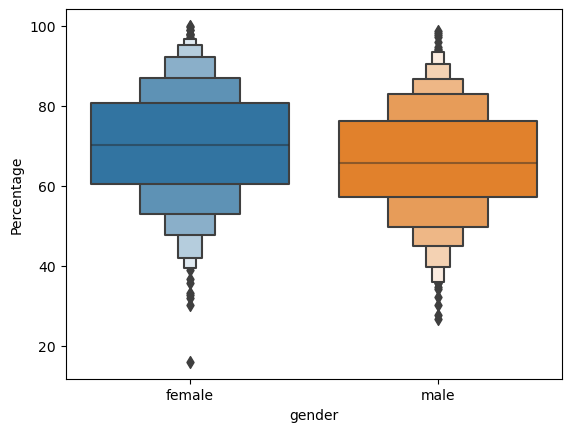

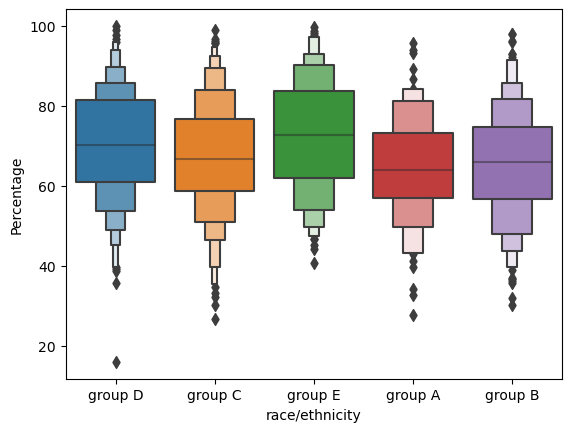

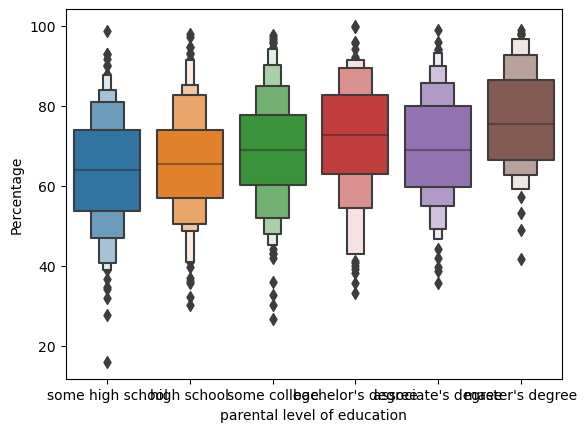

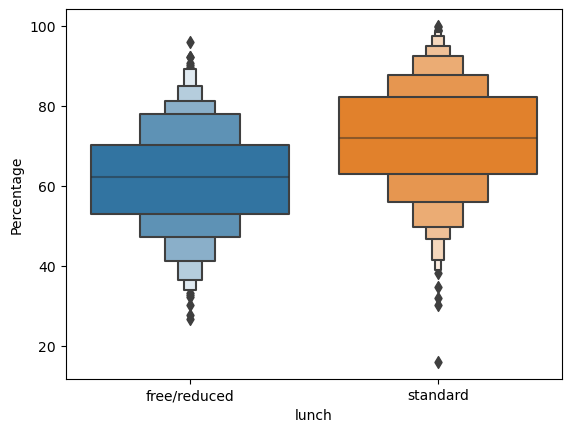

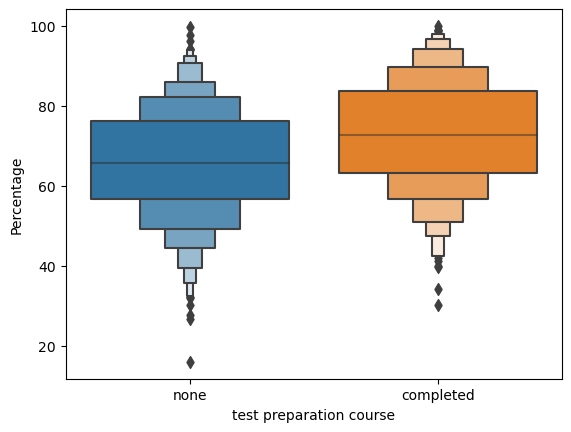

In [8]:
# Box plot
sns.boxenplot(x="gender", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="race/ethnicity", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="parental level of education", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="lunch", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="test preparation course", y="Percentage", data=df)
plt.show()

In [9]:
# # حذف داده‌های پرت
df = df[df["Percentage"] < df["Percentage"].quantile(0.955)]
df = df[df["Percentage"] > df["Percentage"].quantile(0.015)]

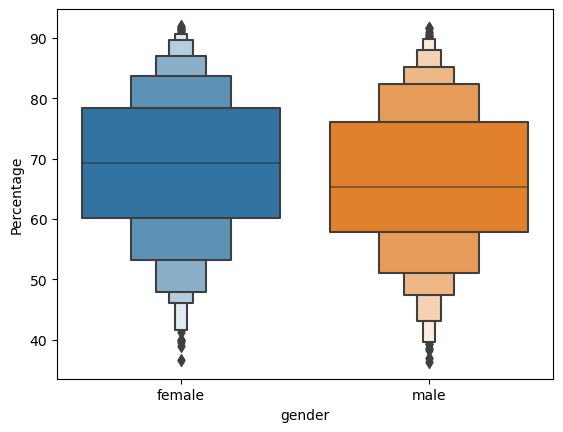

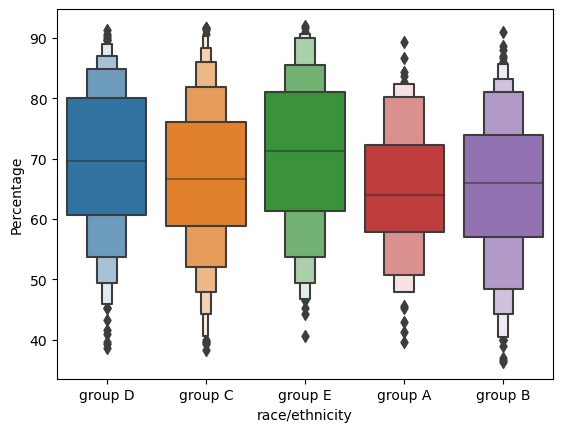

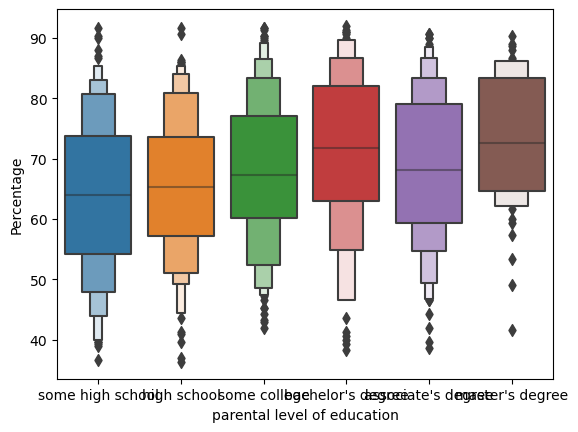

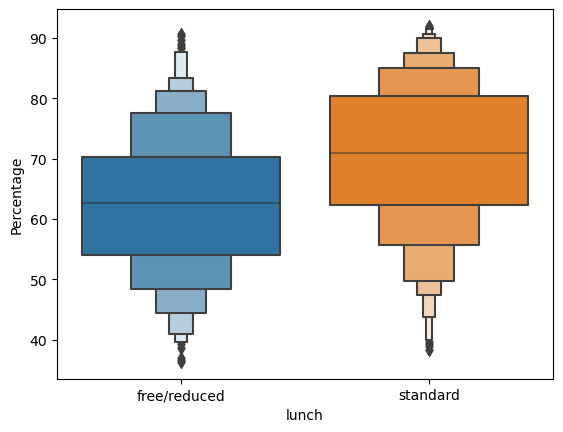

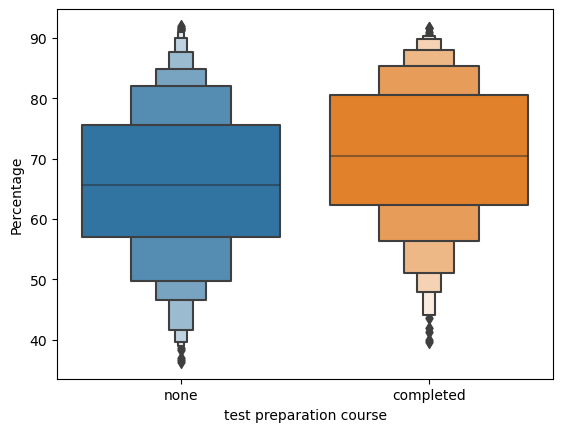

In [10]:
# Box plot
sns.boxenplot(x="gender", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="race/ethnicity", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="parental level of education", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="lunch", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="test preparation course", y="Percentage", data=df)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       939 non-null    object 
 1   race/ethnicity               939 non-null    object 
 2   parental level of education  939 non-null    object 
 3   lunch                        939 non-null    object 
 4   test preparation course      939 non-null    object 
 5   math score                   939 non-null    int64  
 6   reading score                939 non-null    int64  
 7   writing score                939 non-null    int64  
 8   Total marks                  939 non-null    int64  
 9   Percentage                   939 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 80.7+ KB


# BINING

# assign grades to the marks

In [12]:
# Quantile Binning
df['Grade_math 1 bin'] = pd.qcut(df['math score'], 2, labels=['low', 'high'])

df['Grade_math bin 4'] = pd.qcut(df['math score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_math bin 8'] = pd.qcut(df['math score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])



# Quantile Binning
df['Grade_reading 1 bin'] = pd.qcut(df['reading score'], 2, labels=['low', 'high'])

df['Grade_reading 4 bin'] = pd.qcut(df['reading score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_reading 8 bin'] = pd.qcut(df['reading score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])


# Quantile Binning
df['Grade_writing 1 bin'] = pd.qcut(df['writing score'], 2, labels=['low', 'high'])

df['Grade_writing 4 bin'] = pd.qcut(df['writing score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_writing 8 bin'] = pd.qcut(df['writing score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])


<AxesSubplot:xlabel='Grade_math 1 bin', ylabel='count'>

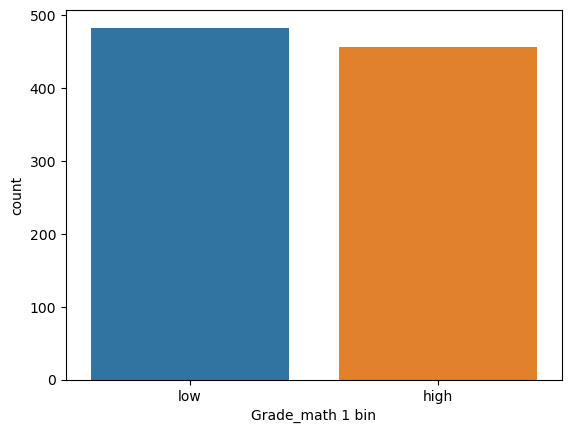

In [13]:
sns.countplot(x='Grade_math 1 bin', data=df)

<AxesSubplot:xlabel='Grade_math bin 4', ylabel='count'>

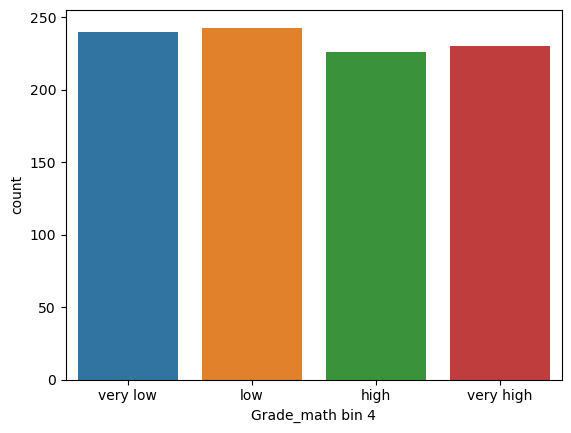

In [14]:
sns.countplot(x='Grade_math bin 4', data=df)


<AxesSubplot:xlabel='Grade_math bin 8', ylabel='count'>

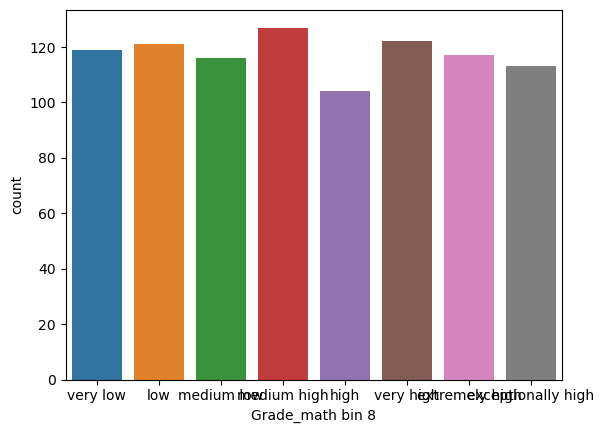

In [15]:
sns.countplot(x='Grade_math bin 8', data=df)

<AxesSubplot:xlabel='Grade_reading 1 bin', ylabel='count'>

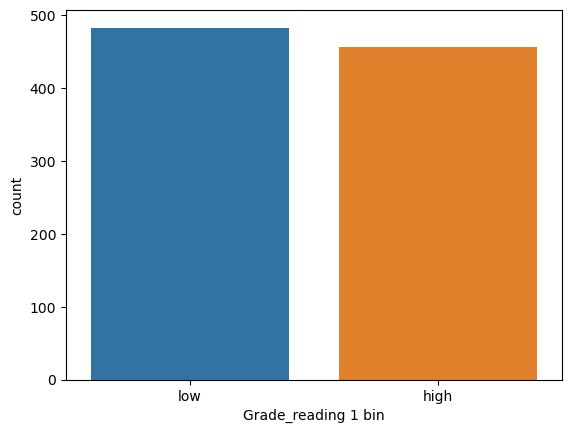

In [16]:
sns.countplot(x='Grade_reading 1 bin', data=df)

<AxesSubplot:xlabel='Grade_reading 4 bin', ylabel='count'>

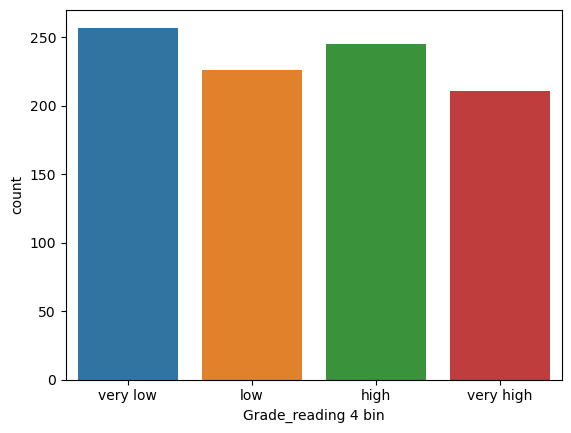

In [17]:
sns.countplot(x='Grade_reading 4 bin', data=df)

<AxesSubplot:xlabel='Grade_reading 8 bin', ylabel='count'>

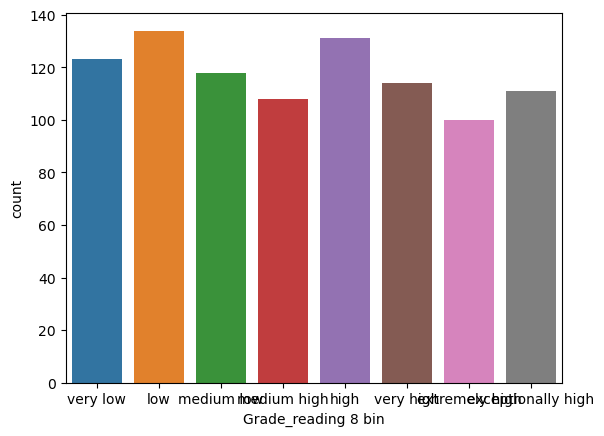

In [18]:
sns.countplot(x='Grade_reading 8 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 1 bin', ylabel='count'>

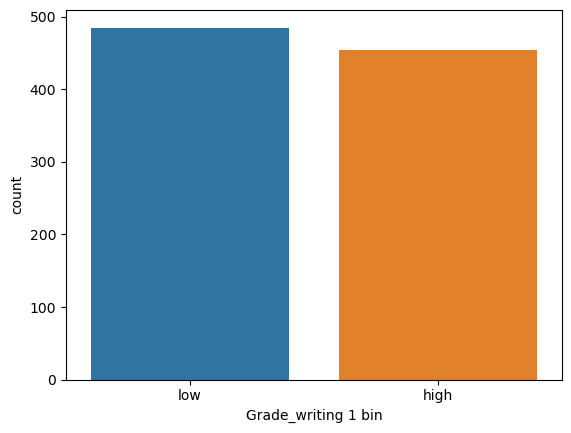

In [19]:
sns.countplot(x='Grade_writing 1 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 4 bin', ylabel='count'>

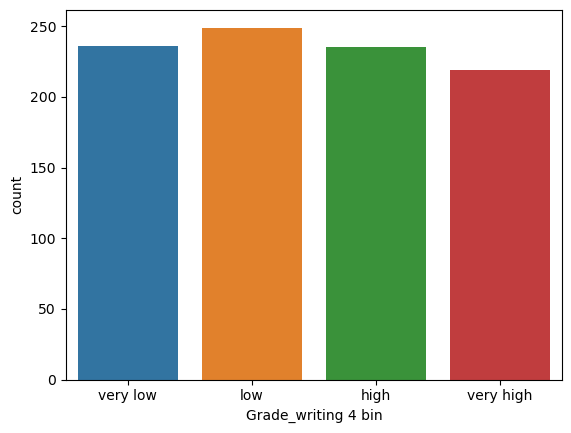

In [20]:
sns.countplot(x='Grade_writing 4 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 8 bin', ylabel='count'>

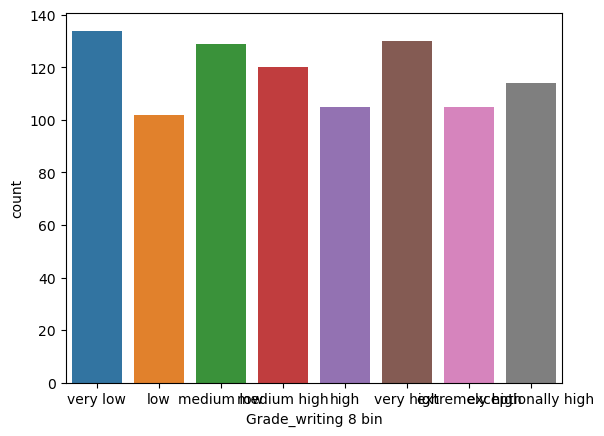

In [21]:
sns.countplot(x='Grade_writing 8 bin', data=df)

In [22]:
def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 60:
        grade = 'D'
    elif marks >= 50:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
df["Grade_math"] = df["math score"].apply(lambda s: Grade(s))
df["Grade_reading"] = df["reading score"].apply(lambda s: Grade(s))
df["Grade_writing"] = df["writing score"].apply(lambda s: Grade(s))
df["Overall_grade"] = df["Percentage"].apply(lambda s: Grade(s))
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group D            some high school  free/reduced   
1    male        group D                 high school  free/reduced   
2  female        group C                some college      standard   
3  female        group E                 high school      standard   
4    male        group A            some high school      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          57             76             69   
1                    none          39             40             40   
2                    none          66             67             66   
3                    none          61             73             74   
4                    none          48             44             45   

   Total marks  Percentage  ... Grade_reading 1 bin Grade_reading 4 bin  \
0          202   67.333333  ...                high                high   
1          119   39.666667  ...                 low            very low   
2          199   66.333333  ...                 low                 low   
3          208   69.333333  ...                high                high   
4          137   45.666667  ...                 low            very low   

  Grade_reading 8 bin Grade_writing 1 bin Grade_writing 4 bin  \
0           very high                high                high   
1            very low                 low            very low   
2         medium high                 low                 low   
3                high                high                high   
4            very low                 low            very low   

  Grade_writing 8 bin Grade_math Grade_reading Grade_writing Overall_grade  
0                high          E             C             D             D  
1            very low          F             F             F             F  
2         medium high          D             D             D             D  
3           very high          D             C             C             D  
4            very low          F             F             F             F  

[5 rows x 23 columns]

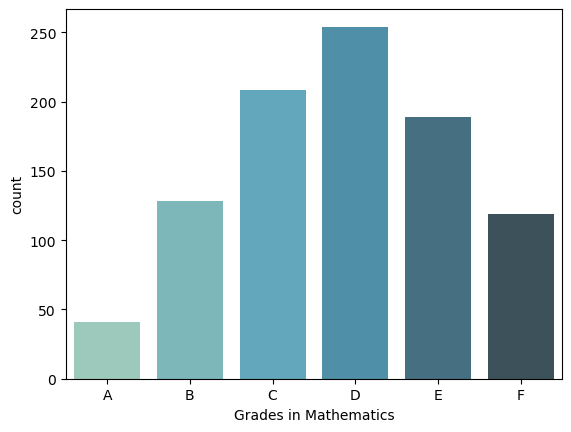

In [23]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Mathematics")

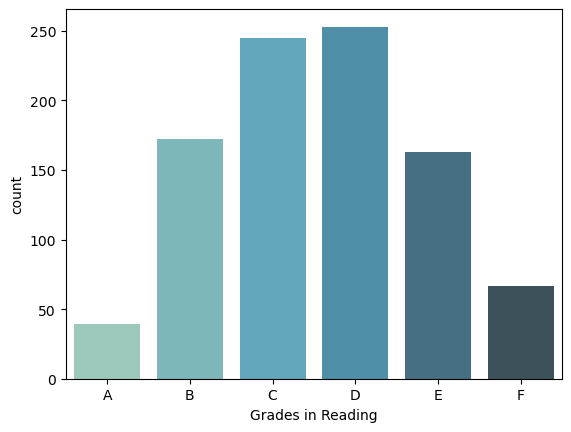

In [24]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_reading", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Reading")

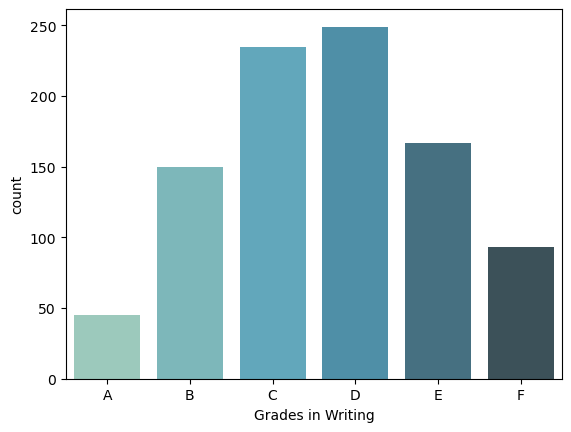

In [25]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_writing", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Writing")

Two methods for binning were investigated, the first one was quantile binning, which divided each grade into 2, 4, and 8 categories, and in the second method, based on the grades, we placed each grade in a group between A to F and we reached the conclusion by observing the boxplot diagram. More information can be obtained using the second method

# visualizing the data

### count of students

In [26]:
gen = df["gender"].value_counts().reset_index()
gen.columns = ["gender", "count"]
gen

#pie plot for gender
px.pie(gen, names = "gender", values = "count",color_discrete_sequence = 
       px.colors.sequential.Bluyl,
      title = "Count of Students for Each Gender").update_traces(textinfo = 
                                        "percent+value+label")

Group A - White - British 


Group B - White - Irish 


Group C - White - Any other White background 

Group D - Mixed - White and Black Caribbean 

Group E - Mixed - White and Black African 

Group F - Mixed - White and Asian 

Group G - Mixed - Any other mixed background

In [27]:
#ethnicity count
eth = df["race/ethnicity"].value_counts().reset_index()
eth.columns = ["race", "count"]
eth

#plot for ethnicity
px.pie(eth, names = "race", values = "count", color_discrete_sequence= px.colors.sequential.speed,
       title = "Count of Students Per Ethnicity"
       ).update_traces(textinfo = "percent+label+value")

In [28]:
#count of each degree for parents
p_deg = df["parental level of education"].value_counts().reset_index()
p_deg.columns = ["degree", "count"]
p_deg

#plot for parents education
# px.bar(p_deg, x = "degree", y = "count", color_continuous_scale = "jet", color = "count", text = "count", title = "Students Parents Education")

#plot for degree
px.pie(p_deg, names = "degree", values = "count", color_discrete_sequence= px.colors.sequential.speed,
       title = "Count of Students Per grade").update_traces(textinfo = "percent+label+value")

In [29]:
#lunch preference by students
lunch = df["lunch"].value_counts().reset_index()
lunch.columns = ["lunch", "count"]

# px.bar(lunch, x = "lunch", y = "count", color = "lunch", text = "count")

px.pie(lunch, names = "lunch", values = "count", color_discrete_sequence= px.colors.sequential.speed,
       title = "Count of Students Per lunch").update_traces(textinfo = "percent+label+value")

In [30]:
#test preparation course
preparation = df["test preparation course"].value_counts().reset_index()
preparation.columns = ["test preparation course", "count"]


px.pie(preparation, names = "test preparation course", values = "count",
       color_discrete_sequence = px.colors.sequential.Cividis_r).update_traces(textinfo = "percent+label+value")

## The Distribution of Student's Test Scores For Each Subject

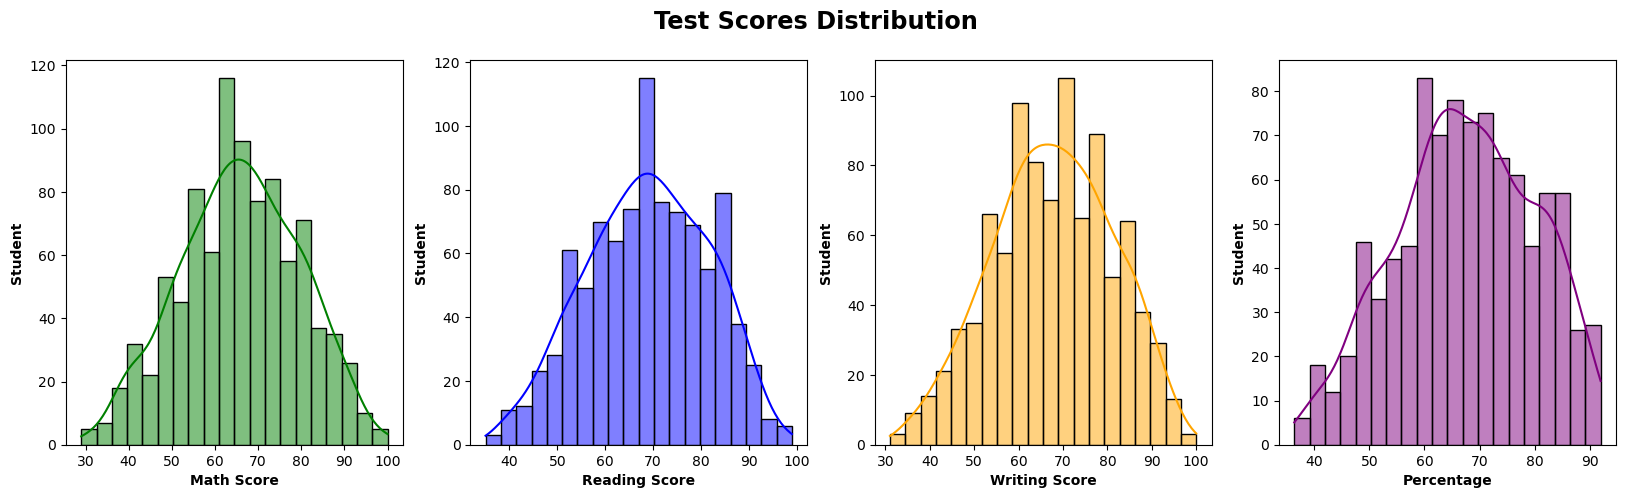

In [31]:
# Plotting the distribution of all the test scores.

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
 
fig.suptitle('Test Scores Distribution', fontweight='heavy', size='xx-large')


math_hist = sns.histplot(ax=axes[0], data=df, x='math score', bins = 20, kde=True, color='green')
reading_hist = sns.histplot(ax=axes[1], data=df, x='reading score', bins = 20, kde=True, color='blue')
writing_hist = sns.histplot(ax=axes[2], data=df, x='writing score', bins = 20, kde=True, color='orange')
overall_hist = sns.histplot(ax=axes[3], data=df, x='Percentage', bins = 20, kde=True, color='purple')


math_hist.set_xlabel('Math Score', fontweight='bold')
math_hist.set_ylabel('Student', fontweight='bold')

reading_hist.set_xlabel('Reading Score', fontweight='bold')
reading_hist.set_ylabel('Student', fontweight='bold')

writing_hist.set_xlabel('Writing Score', fontweight='bold')
writing_hist.set_ylabel('Student', fontweight='bold')

overall_hist.set_xlabel('Percentage', fontweight='bold')
overall_hist.set_ylabel('Student', fontweight='bold')

plt.show()

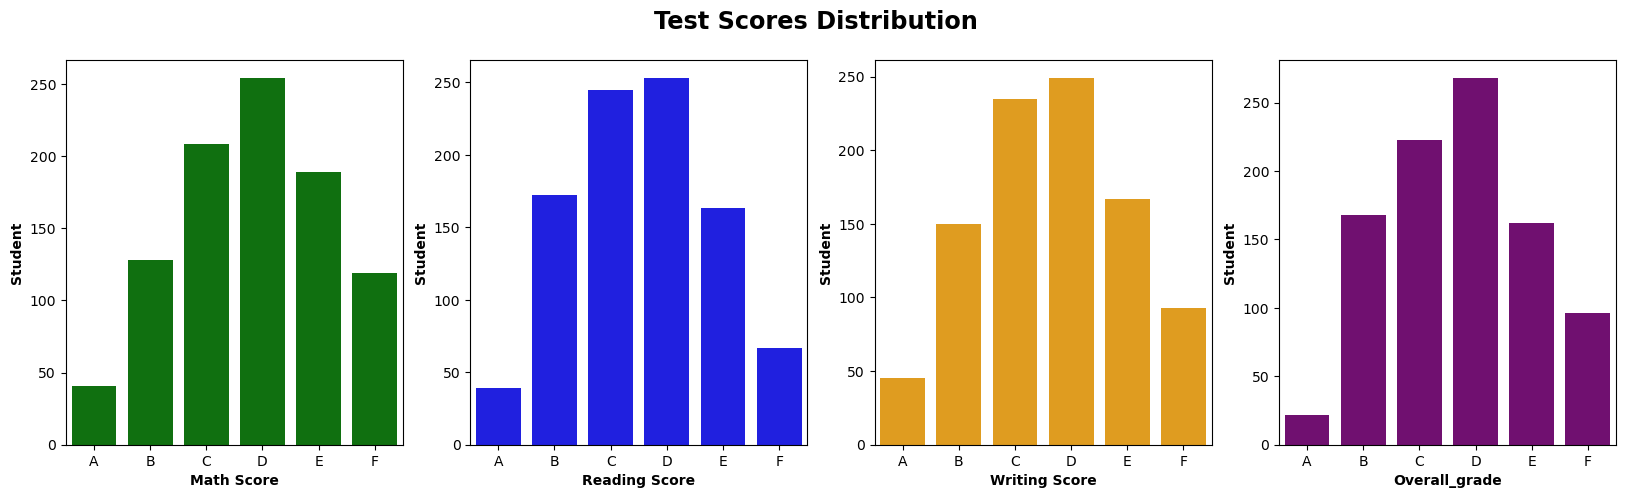

In [32]:
# Plotting the distribution of all the test scores.

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
 
fig.suptitle('Test Scores Distribution', fontweight='heavy', size='xx-large')


math_hist = sns.countplot(ax=axes[0], data=df, x='Grade_math',order=['A','B','C','D','E','F'], color='green')
reading_hist = sns.countplot(ax=axes[1], data=df, x='Grade_reading',order=['A','B','C','D','E','F'], color='blue')
writing_hist = sns.countplot(ax=axes[2], data=df, x='Grade_writing',order=['A','B','C','D','E','F'], color='orange')
overall_hist = sns.countplot(ax=axes[3], data=df, x='Overall_grade',order=['A','B','C','D','E','F'], color='purple')


math_hist.set_xlabel('Math Score', fontweight='bold')
math_hist.set_ylabel('Student', fontweight='bold')

reading_hist.set_xlabel('Reading Score', fontweight='bold')
reading_hist.set_ylabel('Student', fontweight='bold')

writing_hist.set_xlabel('Writing Score', fontweight='bold')
writing_hist.set_ylabel('Student', fontweight='bold')

overall_hist.set_xlabel('Overall_grade', fontweight='bold')
overall_hist.set_ylabel('Student', fontweight='bold')

plt.show()

### The Overall Student's Performance In Each Subject

Text(0, 0.5, 'Number of People')

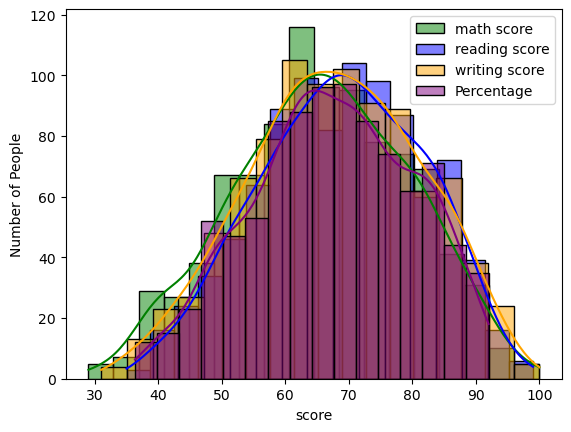

In [33]:
sns.histplot(df["math score"], kde=True, label="math score",alpha=.5, color='green')
sns.histplot(df["reading score"], kde=True, label="reading score",alpha=.5, color='blue')
sns.histplot(df["writing score"], kde=True, label="writing score",alpha=.5, color='orange')
sns.histplot(df["Percentage"], kde=True, label="Percentage",alpha=.5, color='purple')


plt.legend(loc='upper right')
 
plt.xlabel('score')
plt.ylabel('Number of People')

Text(0, 0.5, 'Number of People')

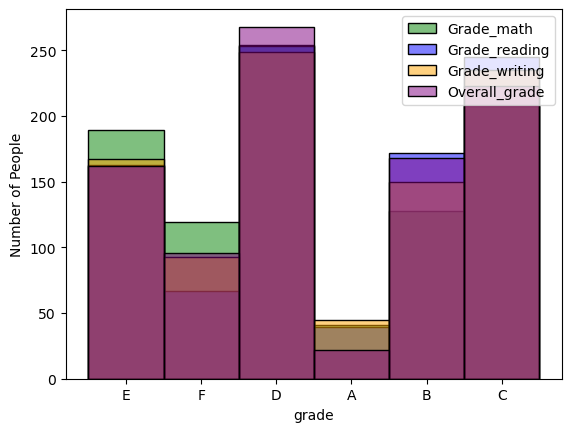

In [34]:
# sns.countplot(df["Grade_math"], alpha=.5, label="Grade_math", color='green')
# sns.countplot(df["Grade_reading"], alpha=.5, label="Grade_reading", color='blue')
# sns.countplot(df["Grade_writing"], alpha=.5, label="Grade_writing", color='orange')
# sns.countplot(df["Overall_grade"], alpha=.5, label="Overall_grade", color='purple')

# plt.legend(loc='upper right')
 
# plt.xlabel('grade')
# plt.ylabel('Number of People')

sns.histplot(df["Grade_math"], alpha=.5, label="Grade_math", color='green')
sns.histplot(df["Grade_reading"], alpha=.5, label="Grade_reading", color='blue')
sns.histplot(df["Grade_writing"], alpha=.5, label="Grade_writing", color='orange')
sns.histplot(df["Overall_grade"], alpha=.5, label="Overall_grade", color='purple')

plt.legend(loc='upper right')
 
plt.xlabel('grade')
plt.ylabel('Number of People')



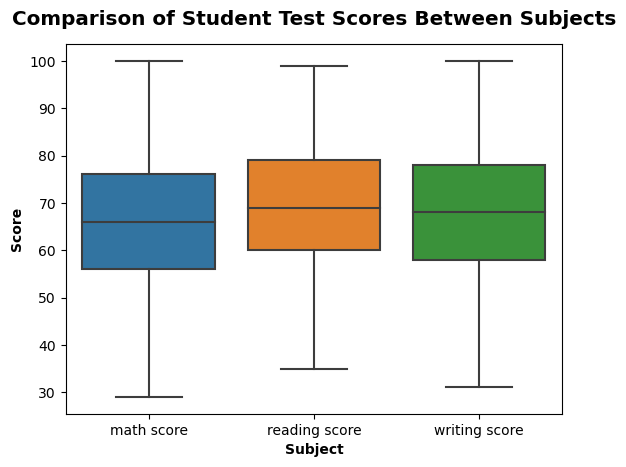

In [35]:
# Looking at the test scores between subjects

test_score = df[['math score', 'reading score', 'writing score']]

test_plot = sns.boxplot(data=test_score)

test_plot.set_title('Comparison of Student Test Scores Between Subjects', y=1.03,
                   fontweight='heavy', size='x-large')

test_plot.set_xlabel('Subject', fontweight='bold')
test_plot.set_ylabel('Score', fontweight='bold')

plt.show()

# correlation

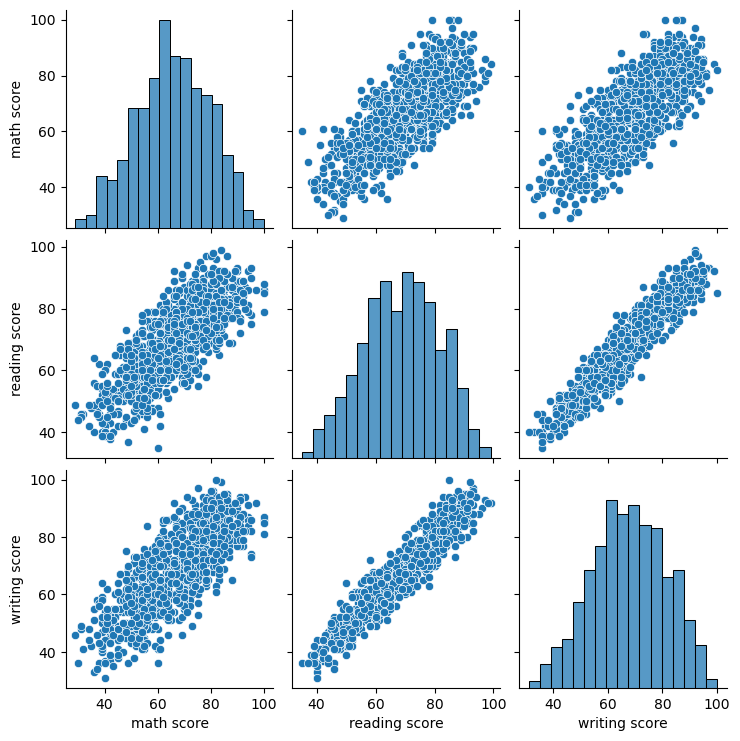

In [36]:
# Pair plot of scores and factors
sns.pairplot(df, vars=['math score', 'reading score', 'writing score'],kind='scatter')
plt.show()


### reading score and writing score are related

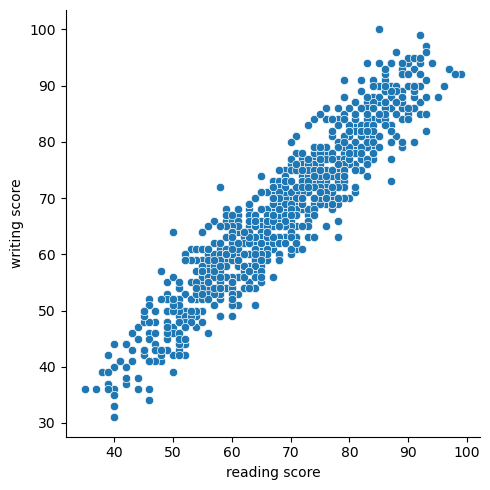

In [37]:
sns.relplot(x='reading score', y = 'writing score', data = df)

#### reading score and writing score are linearly related

In [38]:
r = np.corrcoef(df["reading score"], df["writing score"])[0, 1]
print(r)

0.9393444721145864


# influence of different factors on students performance

### gender

<AxesSubplot:xlabel='gender', ylabel='Percentage'>

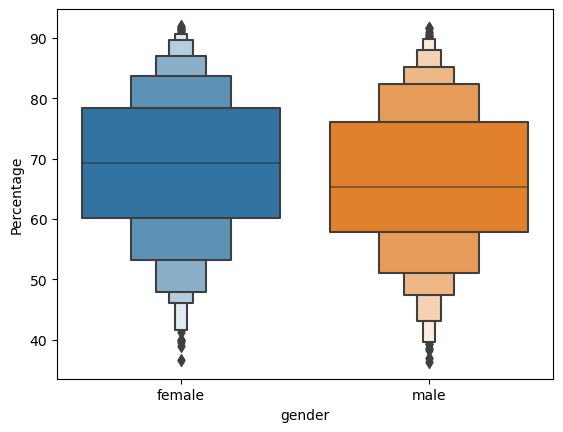

In [39]:
sns.boxenplot(x="gender", y="Percentage", data=df)

<AxesSubplot:xlabel='gender', ylabel='Percentage'>

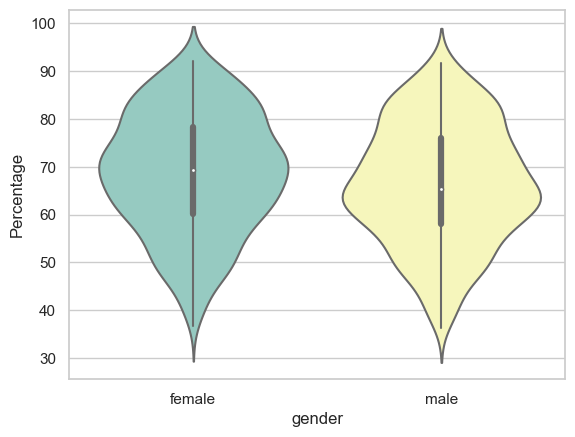

In [40]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'gender', y = 'Percentage', data = df, palette = "Set3") 

<AxesSubplot:xlabel='gender', ylabel='count'>

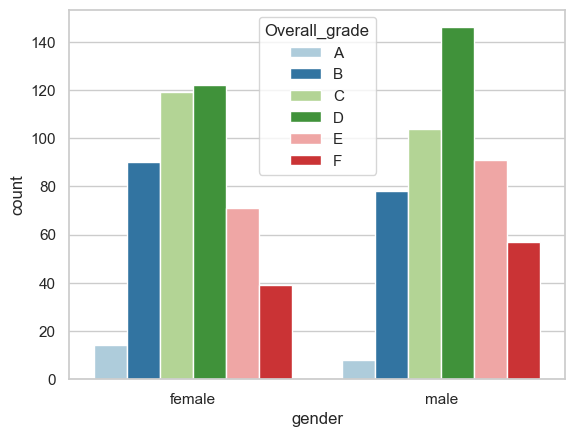

In [41]:
sns.countplot(x = "gender", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

In [42]:
#scores according to gender
test = round(df.groupby("gender")[["math score", "reading score", "writing score"]].mean().reset_index(),2)
# prep = ff.create_table(test, "emrld_r")
# prep

#plot for marks according to test preparations
test_mean = [test["math score"], test["reading score"], test["writing score"]]
px.bar(test, x = "gender", y = test_mean, barmode = "group",
       color_discrete_sequence = px.colors.sequential.Emrld,
       text = "value",
       title = "Marks of Students According to gender").update_layout(xaxis_title = "gender Status",
                                                                                        yaxis_title = "Average Score")

### Race / Ethnicity:

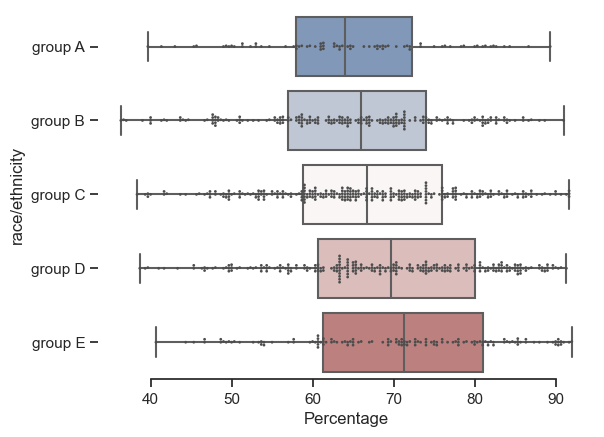

In [43]:
sns.set(style = "ticks")
order_race = ["group A","group B", "group C", "group D", "group E"]
sns.boxplot(x = "Percentage", y = "race/ethnicity", data = df, palette = "vlag", order = order_race)
sns.swarmplot(x = "Percentage", y = "race/ethnicity", data = df, size = 2, color = ".3", linewidth = 0, order = order_race)
sns.despine(trim = True, left = True)

<AxesSubplot:xlabel='race/ethnicity', ylabel='Percentage'>

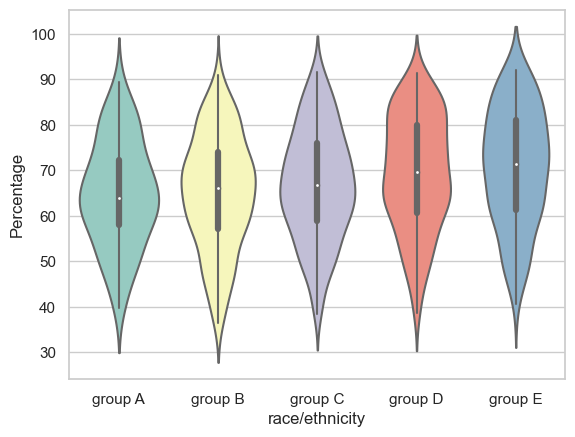

In [44]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'race/ethnicity', y = 'Percentage', data = df, palette = "Set3", order = order_race)

In [45]:
eth_m = df.groupby("race/ethnicity")["math score"].agg(["mean", "sum"]).reset_index()
eth_m.columns = ["race", "math_mean", "math_sum"]
eth_m["math_mean"] = round(eth_m["math_mean"], 2)
eth_r = df.groupby("race/ethnicity")["reading score"].agg(["mean", "sum"]).reset_index()
eth_r.columns = ["race", "reading_mean", "reading_sum"]
eth_r["reading_mean"] = round(eth_r["reading_mean"], 2)
eth_w = df.groupby("race/ethnicity")["writing score"].agg(["mean", "sum"]).reset_index()
eth_w.columns = ["race", "writing_mean", "writing_sum"]
eth_w["writing_mean"] = round(eth_w["writing_mean"], 2)
eth_s = pd.merge(eth_m, eth_r, how = "inner", on = "race")
eth_s = pd.merge(eth_s, eth_w, how = "inner", on = "race")
# r_scores = ff.create_table(eth_s, "YlOrRd_r")
# r_scores

#plot to compare the average score according to race
mean_cols = [eth_s["math_mean"], eth_s["reading_mean"], eth_s["writing_mean"]]
px.bar(eth_s, x = "race", y = mean_cols, barmode = "group", color_discrete_sequence=px.colors.sequential.Sunsetdark, text = "value",
       title = "Average Marks According to Ethnicity").update_layout(xaxis_title = "Ethnicity", yaxis_title = "Average Score")


#### students of group E are scored very well among the ethnicity groups

### Lunch:

<AxesSubplot:xlabel='lunch', ylabel='Percentage'>

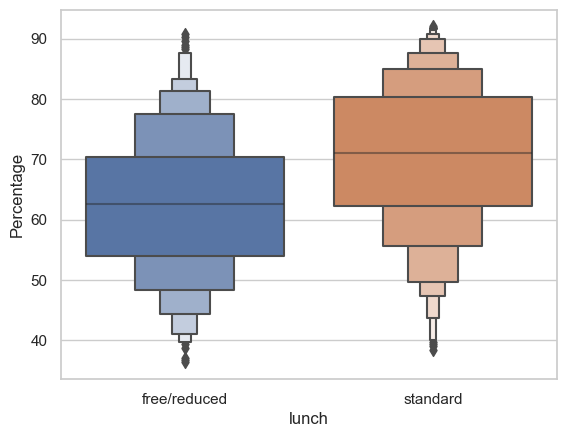

In [46]:
sns.boxenplot(x="lunch", y="Percentage", data=df)

In [47]:
#scores according to "gender"
test = round(df.groupby("lunch")[["math score", "reading score", "writing score"]].mean().reset_index(),2)
# prep = ff.create_table(test, "emrld_r")
# prep

#plot for marks according to test preparations
test_mean = [test["math score"], test["reading score"], test["writing score"]]
px.bar(test, x = "lunch", y = test_mean, barmode = "group",
       color_discrete_sequence = px.colors.sequential.Emrld,
       text = "value",
       title = "Marks of Students According to lunch").update_layout(xaxis_title = "lunch Status",
                                                                                        yaxis_title = "Average Score")

#### students with standard lunch scored better than the others

In [48]:
# sns.countplot(x = "lunch", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

### Test preparation course:

<AxesSubplot:xlabel='test preparation course', ylabel='Percentage'>

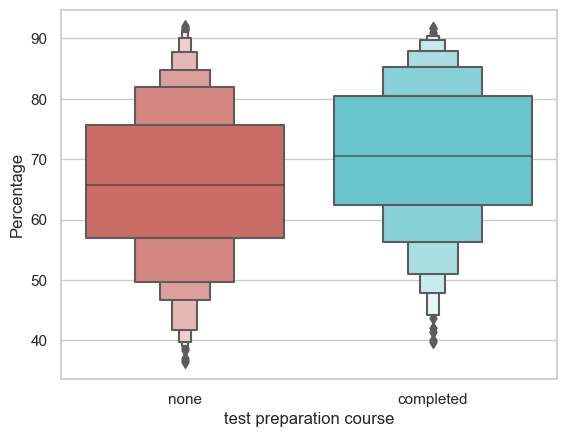

In [49]:
sns.boxenplot(x='test preparation course', y='Percentage',data = df, palette = "hls")

In [50]:
#scores according to test prep
test = round(df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean().reset_index(),2)
# prep = ff.create_table(test, "emrld_r")
# prep

#plot for marks according to test preparations
test_mean = [test["math score"], test["reading score"], test["writing score"]]
px.bar(test, x = "test preparation course", y = test_mean, barmode = "group",
       color_discrete_sequence = px.colors.sequential.Emrld,
       text = "value",
       title = "Marks of Students According to Test Preparations").update_layout(xaxis_title = "Test Course Completion Status",
                                                                                        yaxis_title = "Average Score")

In [51]:
# sns.countplot(x = "test preparation course", hue = "Overall_grade",data = df, hue_order = order_grade, palette = 'Paired')
# _ = plt.legend()

### Parental level of education:

In [52]:
# order_edu = ['some high school','high school',"associate's degree","some college","bachelor's degree","master's degree"]
# p = sns.countplot(x='parental level of education', hue='Overall_grade',data=df, order= order_edu, hue_order = order_grade, palette = 'Paired')
# _ = plt.xlabel('Parents level of education')
# _ = plt.setp(p.get_xticklabels(), rotation = 60)

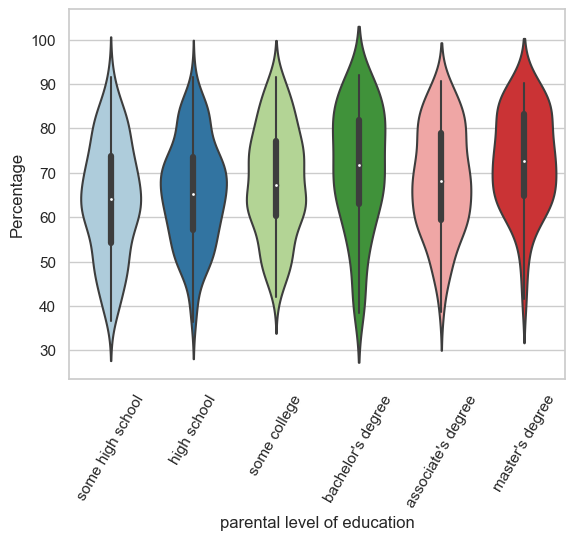

In [53]:
q = sns.violinplot(x="parental level of education", y="Percentage", data = df,palette = "Paired")
_ = plt.setp(q.get_xticklabels(), rotation = 60)

In [54]:
#impact of parental education on students
par_ed = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().reset_index()
par_ed["math score"] = round(par_ed["math score"], 2)
par_ed["reading score"] = round(par_ed["reading score"], 2)
par_ed["writing score"] = round(par_ed["writing score"], 2)
# par_av = ff.create_table(par_ed, "peach_r")
# par_av

#plot to compare the impact on parents education level
par_mcol = [par_ed["math score"], par_ed["reading score"], par_ed["writing score"]]
px.bar(par_ed, x = "parental level of education", y = par_mcol, barmode = "group", color_discrete_sequence=px.colors.sequential.Agsunset_r,
       text = "value", title = "Impact on Student Scores Due to Parental Education").update_layout(xaxis_title = "Parental Level of Education", yaxis_title = "Average Score")


the students whose parents have a master's degree performed better

## two attributes

### parental level of education & race/ethnicity

In [55]:
#which race has highest level of parental education
race_par = df.groupby(["parental level of education","race/ethnicity"]).size().reset_index(name = "count")
eth.columns = ["race/ethnicity", "total"]
race_tot = pd.merge(race_par, eth, how = "inner", on = "race/ethnicity")
race_tot["average_degree_count"] = round(race_tot["count"]/race_tot["total"],2)
# ff.create_table(race_tot, "rdbu_r")

px.bar(race_tot, x = "race/ethnicity", y = "average_degree_count", color = "parental level of education", barmode = "group", color_discrete_sequence=
       px.colors.sequential.Turbo, text = [f"{row['count']},  {row['average_degree_count']}" for i, row in race_tot.iterrows()],
       width = 1150).update_traces(textposition = "outside")

In [56]:
#which race has highest test preparation course
race_par = df.groupby(['test preparation course',"race/ethnicity"]).size().reset_index(name = "count")
eth.columns = ["race/ethnicity", "total"]
race_tot = pd.merge(race_par, eth, how = "inner", on = "race/ethnicity")
race_tot["average_preparation_count"] = round(race_tot["count"]/race_tot["total"],2)
# ff.create_table(race_tot, "rdbu_r")

px.bar(race_tot, x = "race/ethnicity", y = "average_preparation_count", color = 'test preparation course',
       barmode = "group", color_discrete_sequence=px.colors.sequential.Turbo,
       text = [f"{row['count']},  {row['average_preparation_count']}" for i, row in race_tot.iterrows()],
       width = 1150).update_traces(textposition = "outside")

In [57]:
#which race has highest lunch
race_par = df.groupby(["lunch","race/ethnicity"]).size().reset_index(name = "count")
eth.columns = ["race/ethnicity", "total"]
race_tot = pd.merge(race_par, eth, how = "inner", on = "race/ethnicity")
race_tot["average_lunch_count"] = round(race_tot["count"]/race_tot["total"],2)
# ff.create_table(race_tot, "rdbu_r")

px.bar(race_tot, x = "race/ethnicity", y = "average_lunch_count", color = "lunch",
       barmode = "group", color_discrete_sequence=px.colors.sequential.Turbo,
       text = [f"{row['count']},  {row['average_lunch_count']}" for i, row in race_tot.iterrows()],
       width = 1150).update_traces(textposition = "outside")

In [58]:
#which race has highest gender
race_par = df.groupby(["gender","race/ethnicity"]).size().reset_index(name = "count")
eth.columns = ["race/ethnicity", "total"]
race_tot = pd.merge(race_par, eth, how = "inner", on = "race/ethnicity")
race_tot["average_gender_count"] = round(race_tot["count"]/race_tot["total"],2)
# ff.create_table(race_tot, "rdbu_r")

px.bar(race_tot, x = "race/ethnicity", y = "average_gender_count", color = "gender",
       barmode = "group", color_discrete_sequence=px.colors.sequential.Turbo,
       text = [f"{row['count']},  {row['average_gender_count']}" for i, row in race_tot.iterrows()],
       width = 1150).update_traces(textposition = "outside")

# Distribution of scores by column for each test score

In [59]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']

score_column = ["math score","reading score","writing score","Percentage"]
def bias_col_scr(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(20,8))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        sns.kdeplot(df[scr_type], color='#e35f62', shade=True, label="score", ax=ax[row][col])
        for value in df[feature].value_counts().index:
            sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
        ax[row][col].legend()
        ax[row][col].set_title("distribution of <"+scr_type+"> by |-"+feature)

    plt.show()

<< math score >>


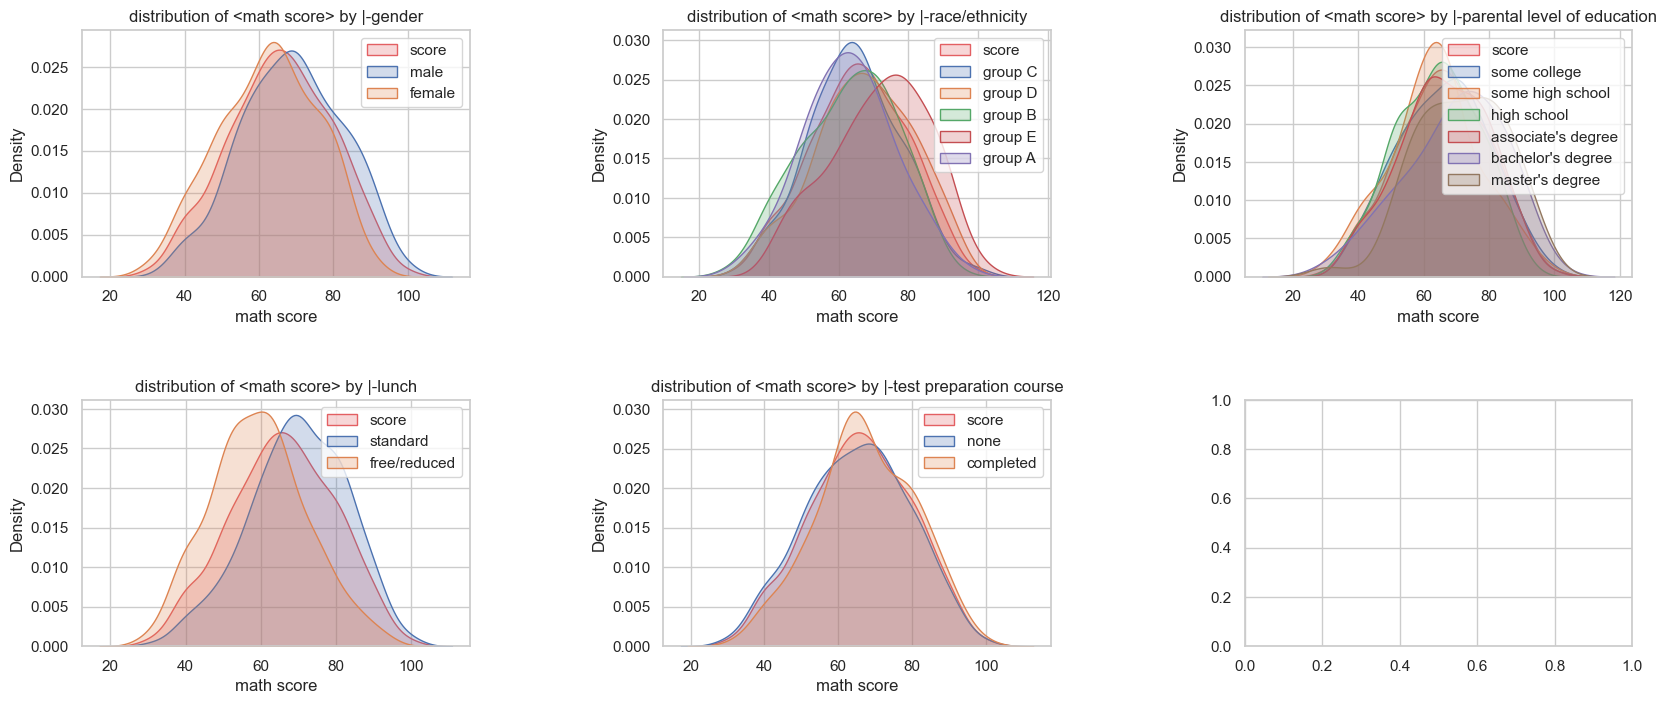

<< reading score >>


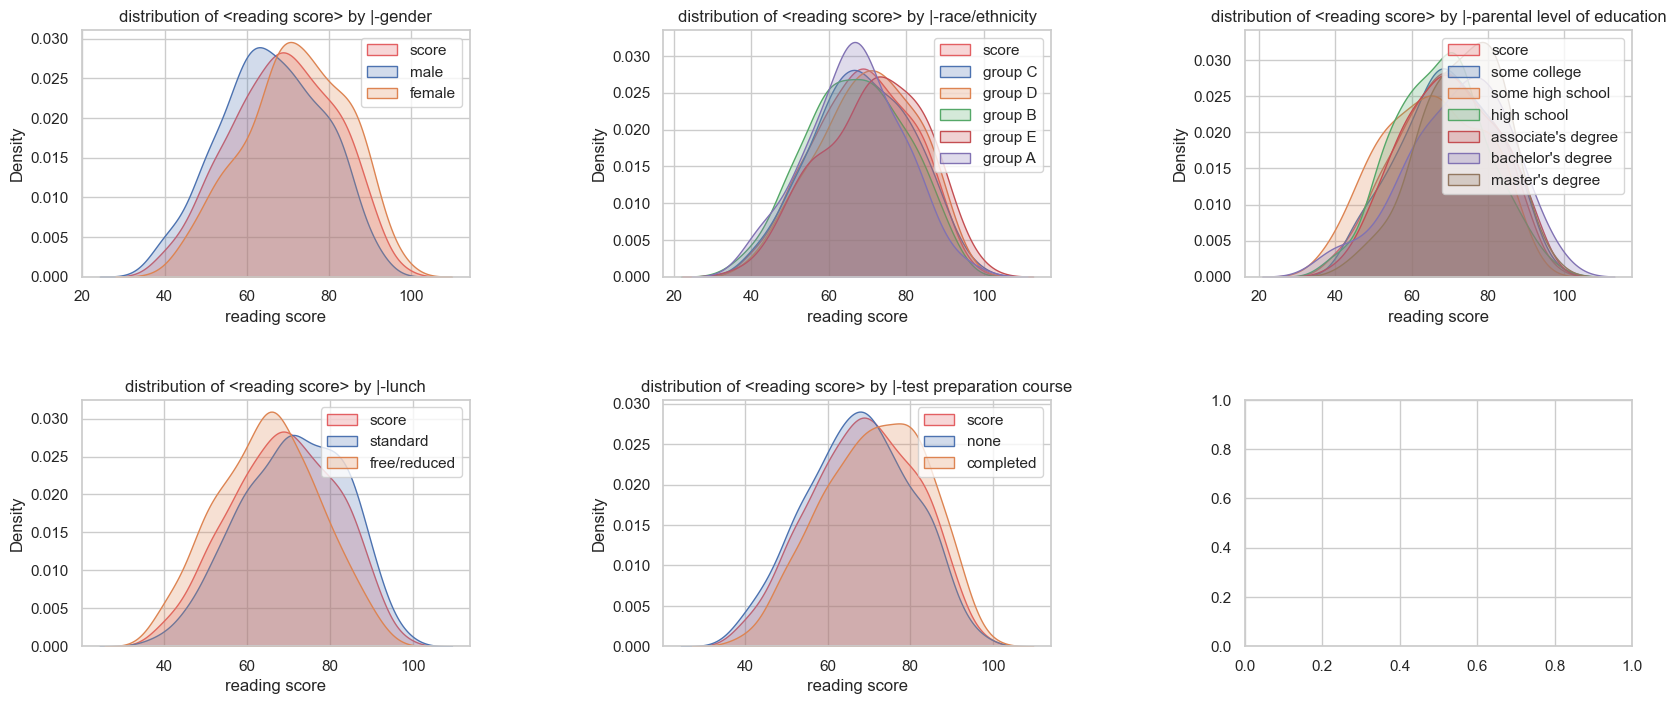

<< writing score >>


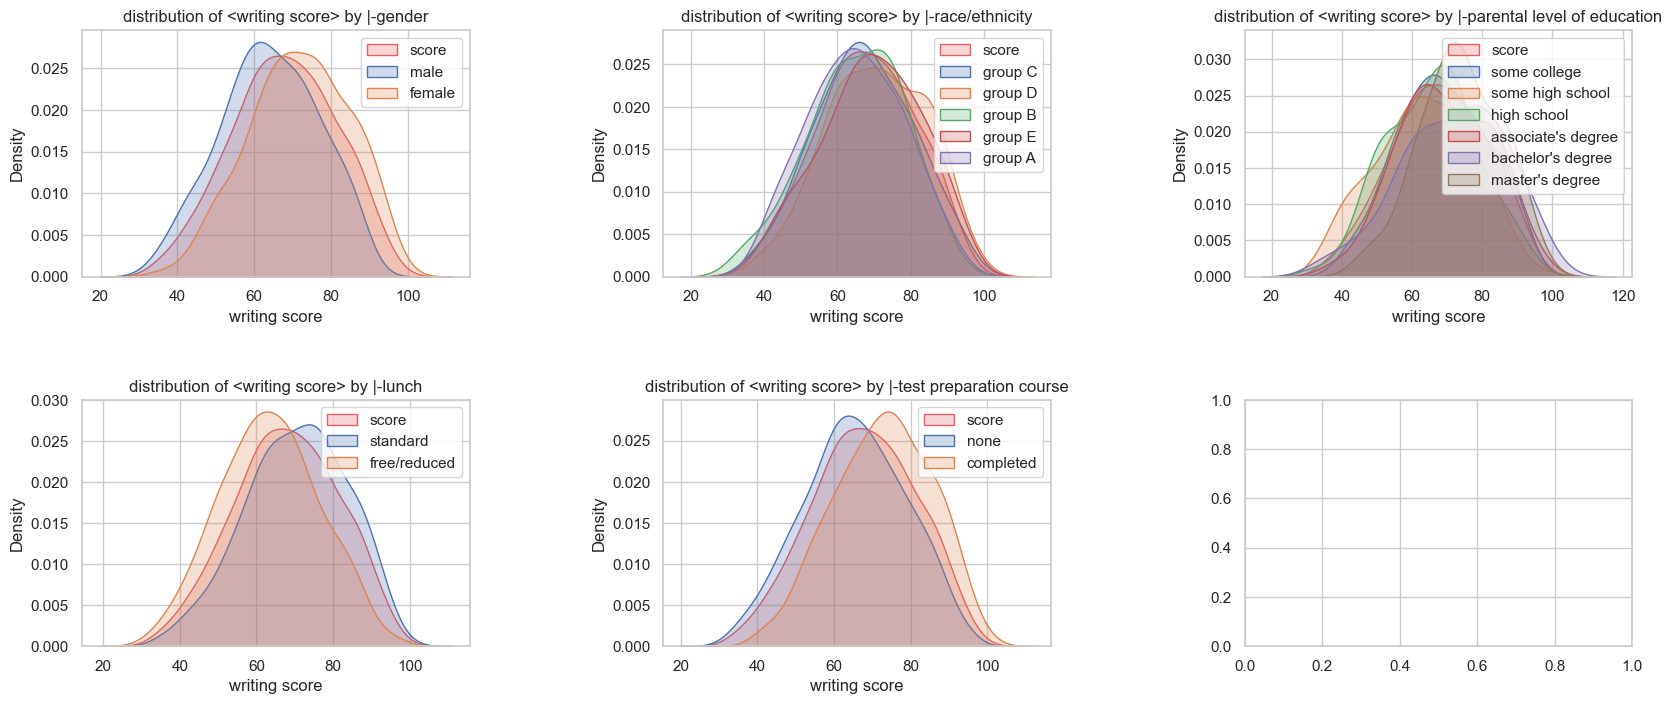

<< Percentage >>


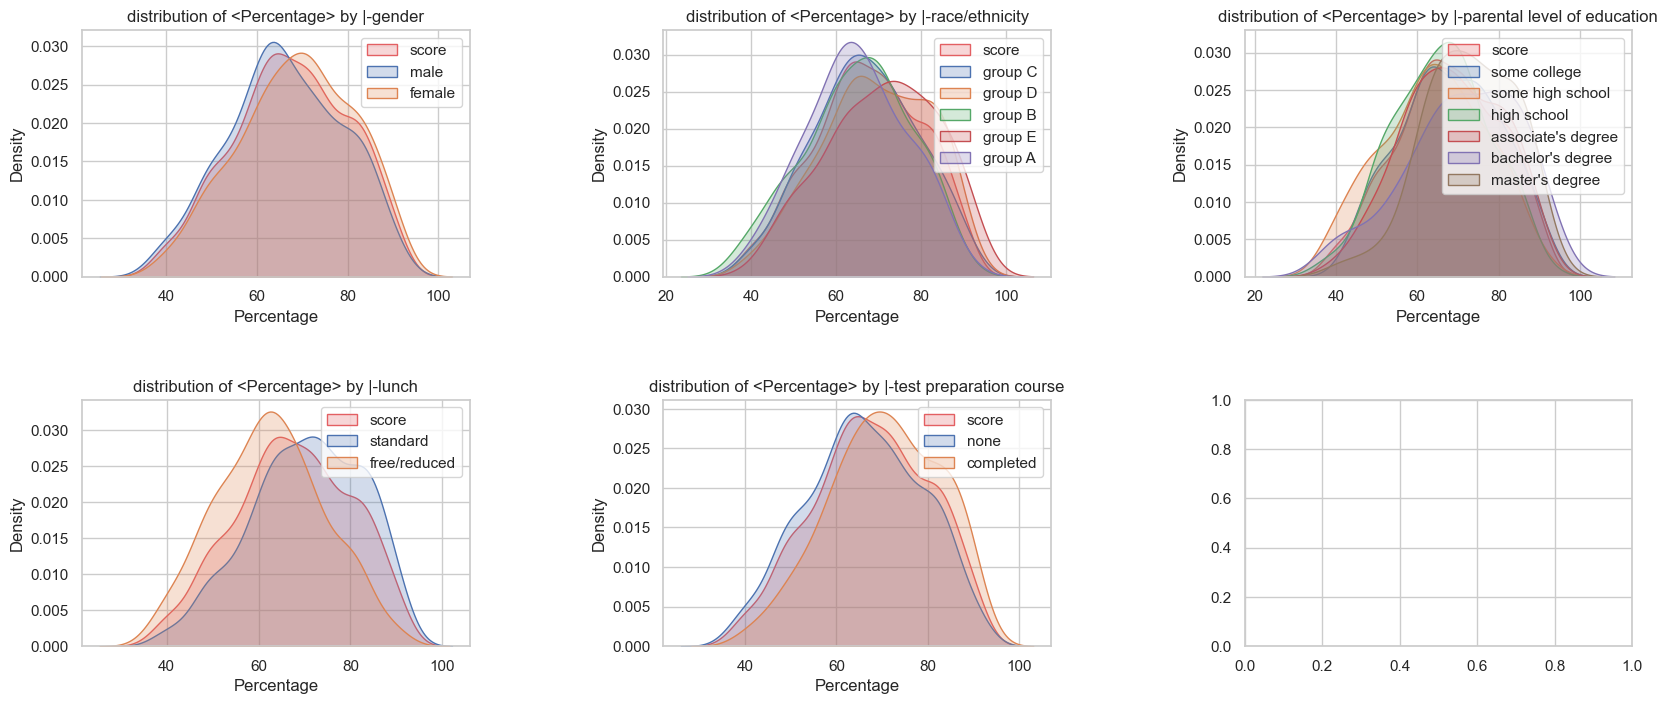

In [60]:
for i in score_column:
    print("<<",i,">>")
    bias_col_scr(i)

# Analysis and visualization of score types for each column

<< math score >>

< gender >
male :  68.8698347107438
female :  62.564835164835166

< race/ethnicity >
group C :  64.45229681978799
group D :  67.39344262295081
group B :  63.136585365853655
group E :  71.70229007633588
group A :  62.89473684210526

< parental level of education >
some college :  66.03389830508475
some high school :  63.361256544502616
high school :  64.05882352941177
associate's degree :  66.36627906976744
bachelor's degree :  69.35
master's degree :  71.41509433962264

< lunch >
standard :  69.76541095890411
free/reduced :  59.31549295774648

< test preparation course >
none :  65.13112164296999
completed :  67.22875816993464


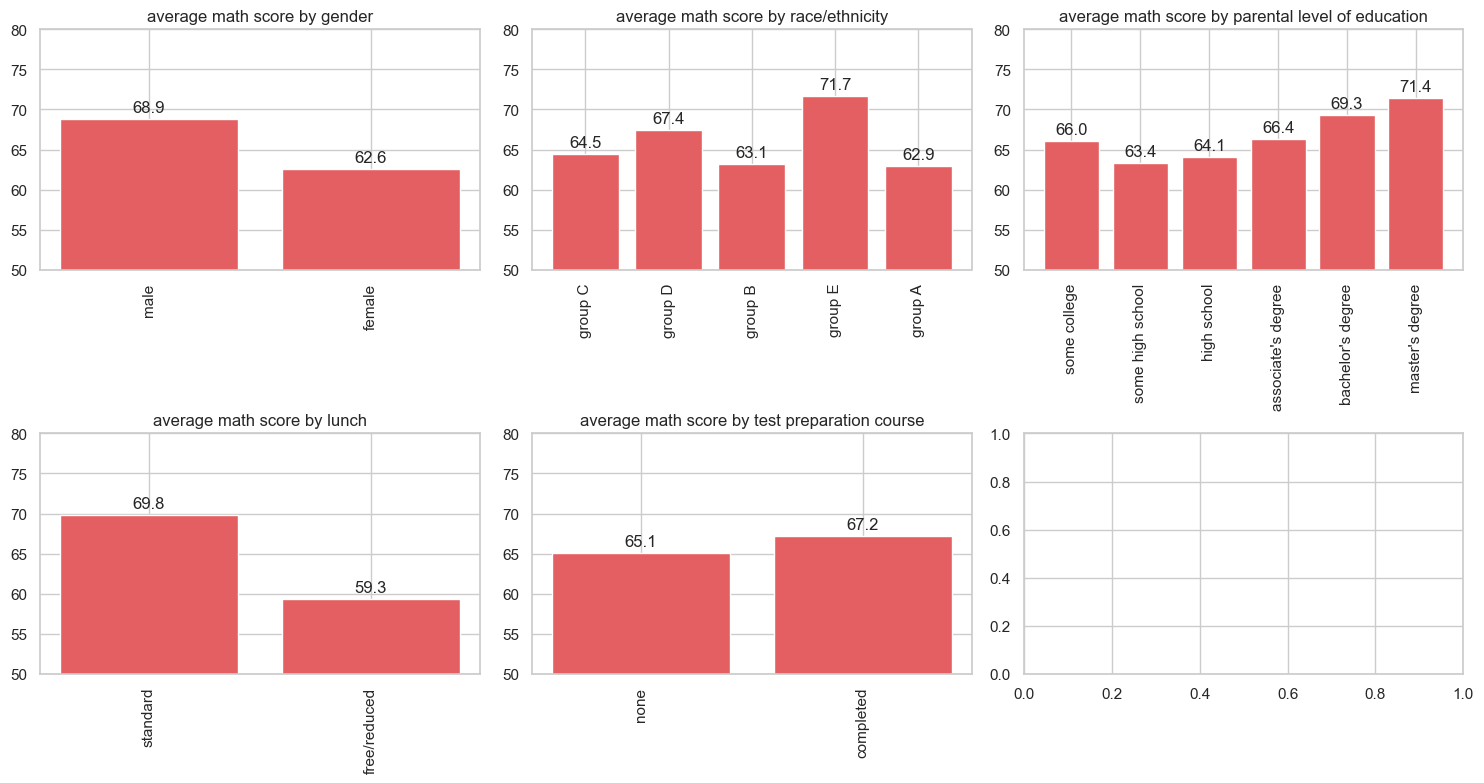

<< reading score >>

< gender >
male :  66.01239669421487
female :  71.77582417582417

< race/ethnicity >
group C :  68.63604240282686
group D :  70.00819672131148
group B :  66.8780487804878
group E :  71.25954198473282
group A :  66.53947368421052

< parental level of education >
some college :  69.58898305084746
some high school :  65.35602094240838
high school :  67.44385026737967
associate's degree :  69.90697674418605
bachelor's degree :  71.91
master's degree :  73.11320754716981

< lunch >
standard :  71.1472602739726
free/reduced :  64.95211267605634

< test preparation course >
none :  67.5260663507109
completed :  71.45098039215686


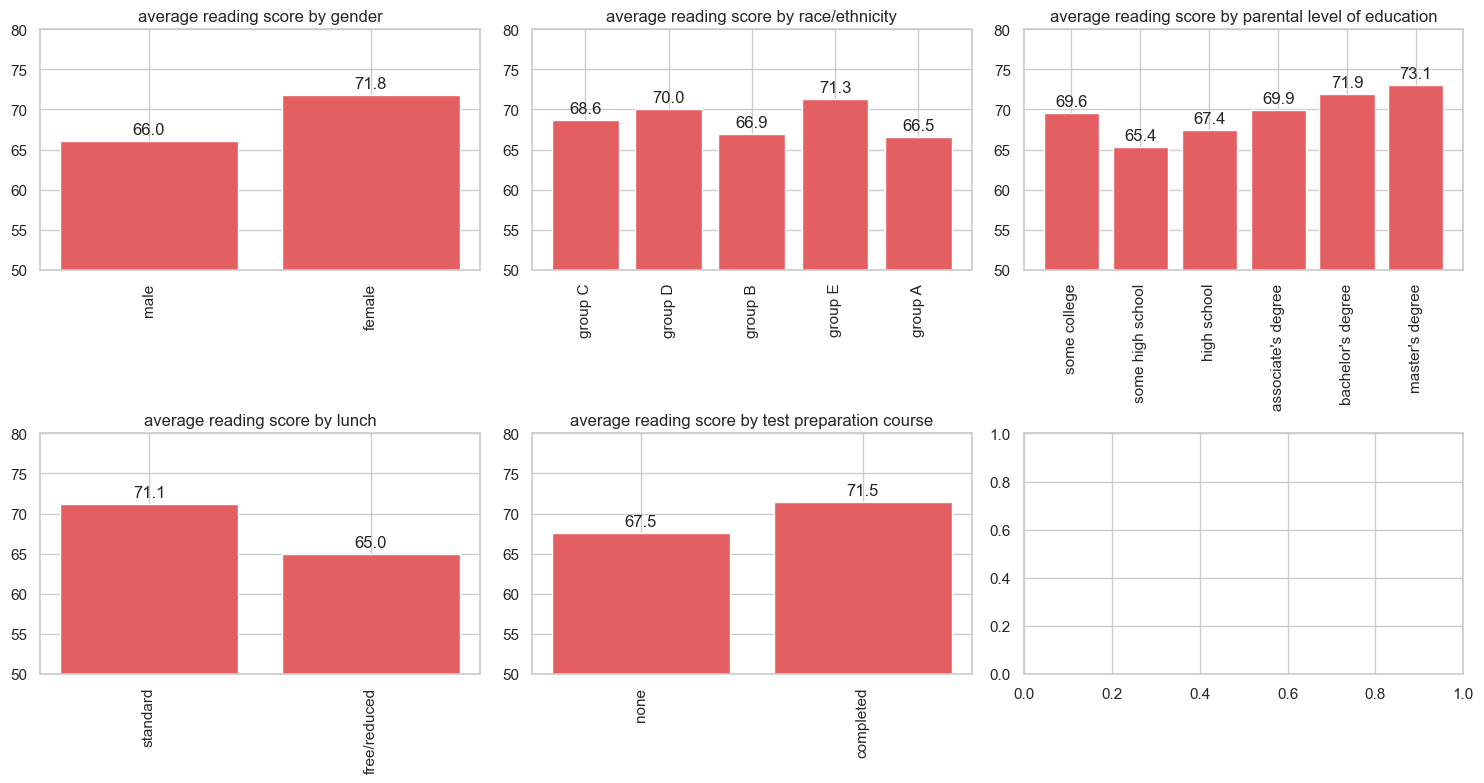

<< writing score >>

< gender >
male :  63.97933884297521
female :  71.65934065934066

< race/ethnicity >
group C :  67.2155477031802
group D :  70.52459016393442
group B :  65.11219512195122
group E :  69.1526717557252
group A :  64.92105263157895

< parental level of education >
some college :  68.49152542372882
some high school :  63.78010471204188
high school :  65.50267379679144
associate's degree :  69.33720930232558
bachelor's degree :  71.52
master's degree :  73.54716981132076

< lunch >
standard :  70.33561643835617
free/reduced :  63.36619718309859

< test preparation course >
none :  65.34439178515008
completed :  72.57516339869281


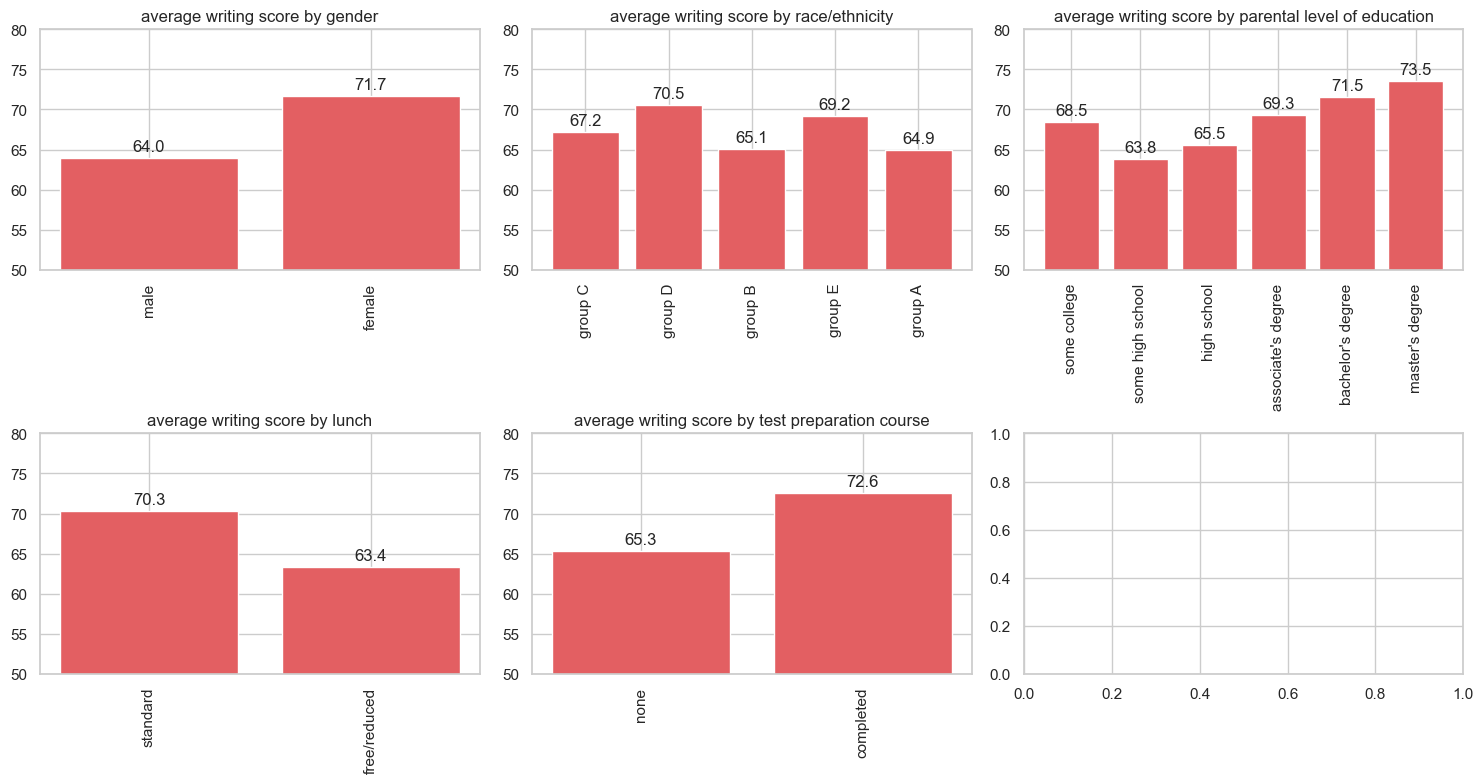

<< Percentage >>

< gender >
male :  66.28719008264463
female :  68.66666666666666

< race/ethnicity >
group C :  66.76796230859834
group D :  69.30874316939892
group B :  65.04227642276423
group E :  70.70483460559795
group A :  64.78508771929823

< parental level of education >
some college :  68.03813559322033
some high school :  64.16579406631762
high school :  65.66844919786095
associate's degree :  68.53682170542636
bachelor's degree :  70.92666666666666
master's degree :  72.69182389937107

< lunch >
standard :  70.41609589041096
free/reduced :  62.544600938967136

< test preparation course >
none :  66.00052659294364
completed :  70.41830065359477


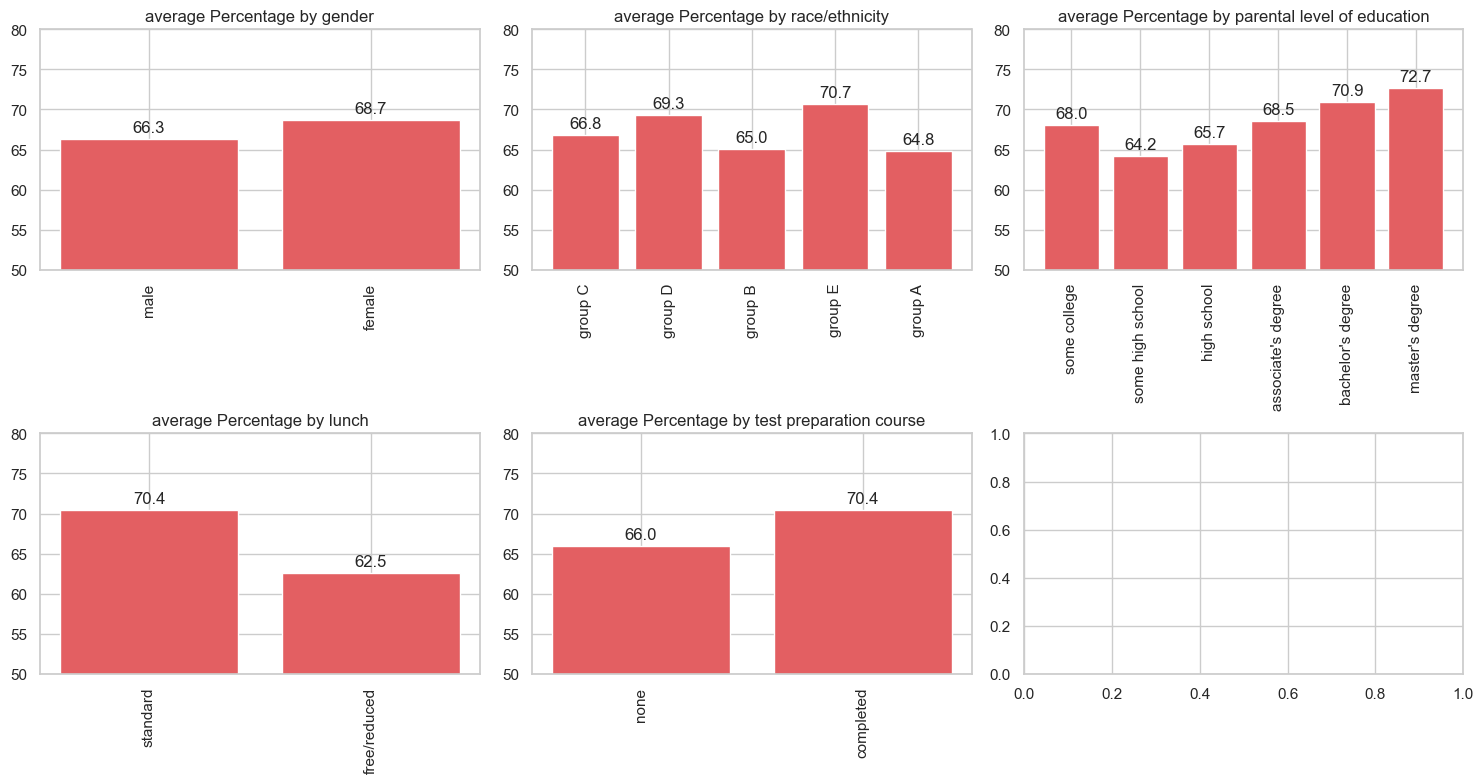

In [61]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']


def bias_col_scr_2(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(15,8))
    ax = ax.flatten()
    for i, feature in enumerate(features):
        print("")
        print("<",feature,">")
        x = []
        y = []
        for j in df[feature].value_counts().index:
            print(j, ": ", np.mean(df[df[feature]==j][scr_type].values))
            x.append(j)
            y.append(np.mean(df[df[feature]==j][scr_type].values))
        plt.sca(ax[i])
        plt.bar(x, y, color='#e35f62')
        for b in range(len(x)):
            height = y[b]
            plt.text(x[b], height + 0.5, '%.1f' % height, ha='center', va='bottom', size=12)
        plt.ylim(50, 80)
        plt.title("average "+scr_type+" by "+feature)
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
for i in score_column:
    print("<<",i,">>")
    bias_col_scr_2(i)

# Check correlation with HeatMap

In [62]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group D            some high school  free/reduced   
1    male        group D                 high school  free/reduced   
2  female        group C                some college      standard   
3  female        group E                 high school      standard   
4    male        group A            some high school      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          57             76             69   
1                    none          39             40             40   
2                    none          66             67             66   
3                    none          61             73             74   
4                    none          48             44             45   

   Total marks  Percentage  ... Grade_reading 1 bin Grade_reading 4 bin  \
0          202   67.333333  ...                high                high   
1          119   39.666667  ...                 low            very low   
2          199   66.333333  ...                 low                 low   
3          208   69.333333  ...                high                high   
4          137   45.666667  ...                 low            very low   

  Grade_reading 8 bin Grade_writing 1 bin Grade_writing 4 bin  \
0           very high                high                high   
1            very low                 low            very low   
2         medium high                 low                 low   
3                high                high                high   
4            very low                 low            very low   

  Grade_writing 8 bin Grade_math Grade_reading Grade_writing Overall_grade  
0                high          E             C             D             D  
1            very low          F             F             F             F  
2         medium high          D             D             D             D  
3           very high          D             C             C             D  
4            very low          F             F             F             F  

[5 rows x 23 columns]

### standardization of data

In [63]:
data = df[['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'Total marks',
 'Percentage',]].copy()


# gender
sex_mapping = {"male":0,"female":1}

#race/ethnicity
group_mapping = {"group A":0.2,"group B":0.4,"group C":0.6,"group D":0.8,"group E":1}

#parental level of education
degree_mapping = {"some college":0.4,
                  "associate's degree":0.6,
                  "high school":0,
                  "some high school":0.2,
                  "bachelor's degree":0.8,
                  "master's degree":1}

# lunch
lunch_mapping = {"standard":1,
                "free/reduced":0}

# test preparation course
course_mapping = {"none":0,
                 "completed":1}



data["gender"] = data["gender"].map(sex_mapping)
data["race/ethnicity"] = data["race/ethnicity"].map(group_mapping)
data["parental level of education"] = data["parental level of education"].map(degree_mapping)
data["lunch"] = data["lunch"].map(lunch_mapping)
data["test preparation course"] = data["test preparation course"].map(course_mapping)
data.head()

gender  race/ethnicity  parental level of education  lunch  \
0       1             0.8                          0.2      0   
1       0             0.8                          0.0      0   
2       1             0.6                          0.4      1   
3       1             1.0                          0.0      1   
4       0             0.2                          0.2      1   

   test preparation course  math score  reading score  writing score  \
0                        0          57             76             69   
1                        0          39             40             40   
2                        0          66             67             66   
3                        0          61             73             74   
4                        0          48             44             45   

   Total marks  Percentage  
0          202   67.333333  
1          119   39.666667  
2          199   66.333333  
3          208   69.333333  
4          137   45.666667

In [64]:
d_m = []
d_r = []
d_w = []
d_s = []
for i in range(len(df)):
    d_m.append(df['math score'].values[i]/100)
    d_r.append(df['reading score'].values[i]/100)
    d_w.append(df['writing score'].values[i]/100)
    d_s.append(df['Percentage'].values[i]/100)
data['math score'] = d_m
data['reading score'] = d_r
data['writing score'] = d_w
data['Percentage'] = d_s
data.head()

gender  race/ethnicity  parental level of education  lunch  \
0       1             0.8                          0.2      0   
1       0             0.8                          0.0      0   
2       1             0.6                          0.4      1   
3       1             1.0                          0.0      1   
4       0             0.2                          0.2      1   

   test preparation course  math score  reading score  writing score  \
0                        0        0.57           0.76           0.69   
1                        0        0.39           0.40           0.40   
2                        0        0.66           0.67           0.66   
3                        0        0.61           0.73           0.74   
4                        0        0.48           0.44           0.45   

   Total marks  Percentage  
0          202    0.673333  
1          119    0.396667  
2          199    0.663333  
3          208    0.693333  
4          137    0.456667

<AxesSubplot:title={'center':'Correlation of Features'}>

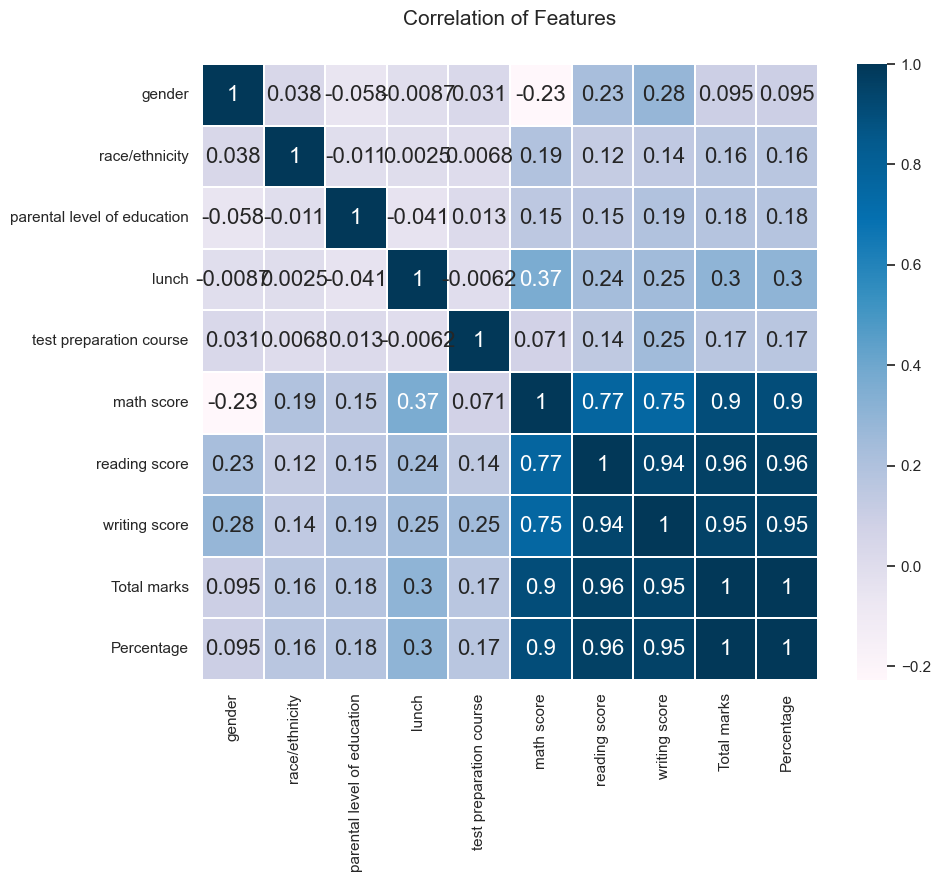

In [65]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

# machine learning

In [67]:
data.head()

gender  race/ethnicity  parental level of education  lunch  \
0       1             0.8                          0.2      0   
1       0             0.8                          0.0      0   
2       1             0.6                          0.4      1   
3       1             1.0                          0.0      1   
4       0             0.2                          0.2      1   

   test preparation course  math score  reading score  writing score  \
0                        0        0.57           0.76           0.69   
1                        0        0.39           0.40           0.40   
2                        0        0.66           0.67           0.66   
3                        0        0.61           0.73           0.74   
4                        0        0.48           0.44           0.45   

   Total marks  Percentage  
0          202    0.673333  
1          119    0.396667  
2          199    0.663333  
3          208    0.693333  
4          137    0.456667

In [68]:
len(data)

939

In [69]:
Xx = data[['lunch', 'test preparation course', 'parental level of education']]

# Add a constant column to the design matrix (required for statsmodels)
Xx = sm.add_constant(Xx)

# Perform multiple regression for math score
y_math = data['math score']
model_math = sm.OLS(y_math, Xx)
results_math = model_math.fit()
print("Math Score Regression Summary:")
print(results_math.summary())

Math Score Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     61.70
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           2.13e-36
Time:                        17:43:37   Log-Likelihood:                 607.14
No. Observations:                 939   AIC:                            -1206.
Df Residuals:                     935   BIC:                            -1187.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [70]:
Xx = data[['lunch', 'test preparation course', 'parental level of education']]

# Add a constant column to the design matrix (required for statsmodels)
Xx = sm.add_constant(Xx)

# Perform multiple regression for reading score
y_math = data['reading score']
model_math = sm.OLS(y_math, Xx)
results_math = model_math.fit()
print("reading Score Regression Summary:")
print(results_math.summary())

reading Score Regression Summary:
                            OLS Regression Results                            
Dep. Variable:          reading score   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     35.80
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           6.64e-22
Time:                        17:43:38   Log-Likelihood:                 654.54
No. Observations:                 939   AIC:                            -1301.
Df Residuals:                     935   BIC:                            -1282.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [73]:
Xx = data[['lunch', 'test preparation course', 'parental level of education']]

# Add a constant column to the design matrix (required for statsmodels)
Xx = sm.add_constant(Xx)

# Perform multiple regression for writing score
y_math = data['writing score']
model_math = sm.OLS(y_math, Xx)
results_math = model_math.fit()
print("writing Score Regression Summary:")
print(results_math.summary())

writing Score Regression Summary:
                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     62.19
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.15e-36
Time:                        17:44:06   Log-Likelihood:                 633.57
No. Observations:                 939   AIC:                            -1259.
Df Residuals:                     935   BIC:                            -1240.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### add column pass_or_not

In [ ]:
data["pass_or_not"] = data["Percentage"].apply(lambda x: 1 if x >= 0.6 else 0)
data.head()

### Split data and target

In [77]:
split_x = data[data.columns[:5]]
split_x.head()

gender  race/ethnicity  parental level of education  lunch  \
0       1             0.8                          0.2      0   
1       0             0.8                          0.0      0   
2       1             0.6                          0.4      1   
3       1             1.0                          0.0      1   
4       0             0.2                          0.2      1   

   test preparation course  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [78]:
split_y = data[data.columns[-1]]
split_y.head()

0    1
1    0
2    1
3    1
4    0
Name: pass_or_not, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(split_x, split_y, test_size=0.4, shuffle=False, random_state=1004)

# baseline

in stratified method it assign labels randomly while maintain distribution of labels

In [80]:
strategies = ['stratified']

dclf = DummyClassifier(strategy = 'stratified', random_state = 0)
dclf.fit(X_train, y_train)
score = dclf.score(X_test, y_test)
print(score)

0.5877659574468085


### Decision Tree Classifier

In [81]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8063943161634103
Test Accuracy: 0.648936170212766


## Compare each model

### k-fold cross validation 

In [82]:
k_fold = KFold(n_splits = 7, shuffle=True, random_state = 0)

In [83]:
knn = KNeighborsClassifier(n_neighbors = 13) #KNN
dtc = DecisionTreeClassifier() # Decision Tree
rfc = RandomForestClassifier(n_estimators=13) #Random Forest
gnb = GaussianNB() # Naive Bayes
svc = SVC() #SVC
gbc = GradientBoostingClassifier()

# Machine learning model
clf_list = [knn,dtc,rfc,gnb,svc,gbc]

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



<BarContainer object of 6 artists>

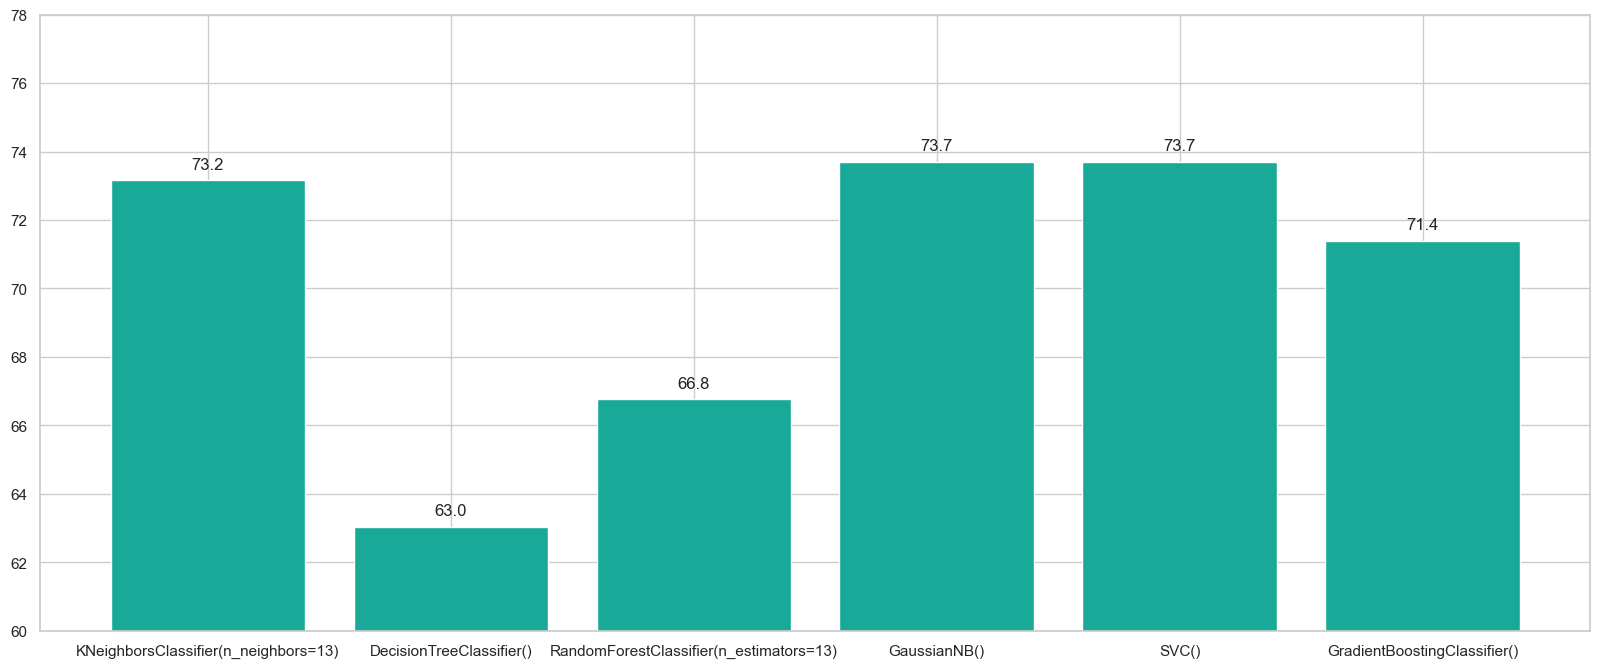

In [84]:
score_list = []
score_name = []
for model in clf_list:
        scoring = "accuracy"
        score = cross_val_score(model, X_train,y_train, cv=k_fold, n_jobs=1, scoring = scoring)
        score_name.append(str(model))
        score = round(np.mean(score)*100,2)
        score_list.append(score) 
        

plt.figure(figsize=(20,8))
x = score_name
y = score_list
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.ylim(60,78)
plt.bar(x, y,color='#18a999')        

GaussianNB , SVC, KNN have highest score in machine learning models with default tuning

accuracy scores obtained from cross-validation shows GaussianNB , SVC, KNN have higher accuracy

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



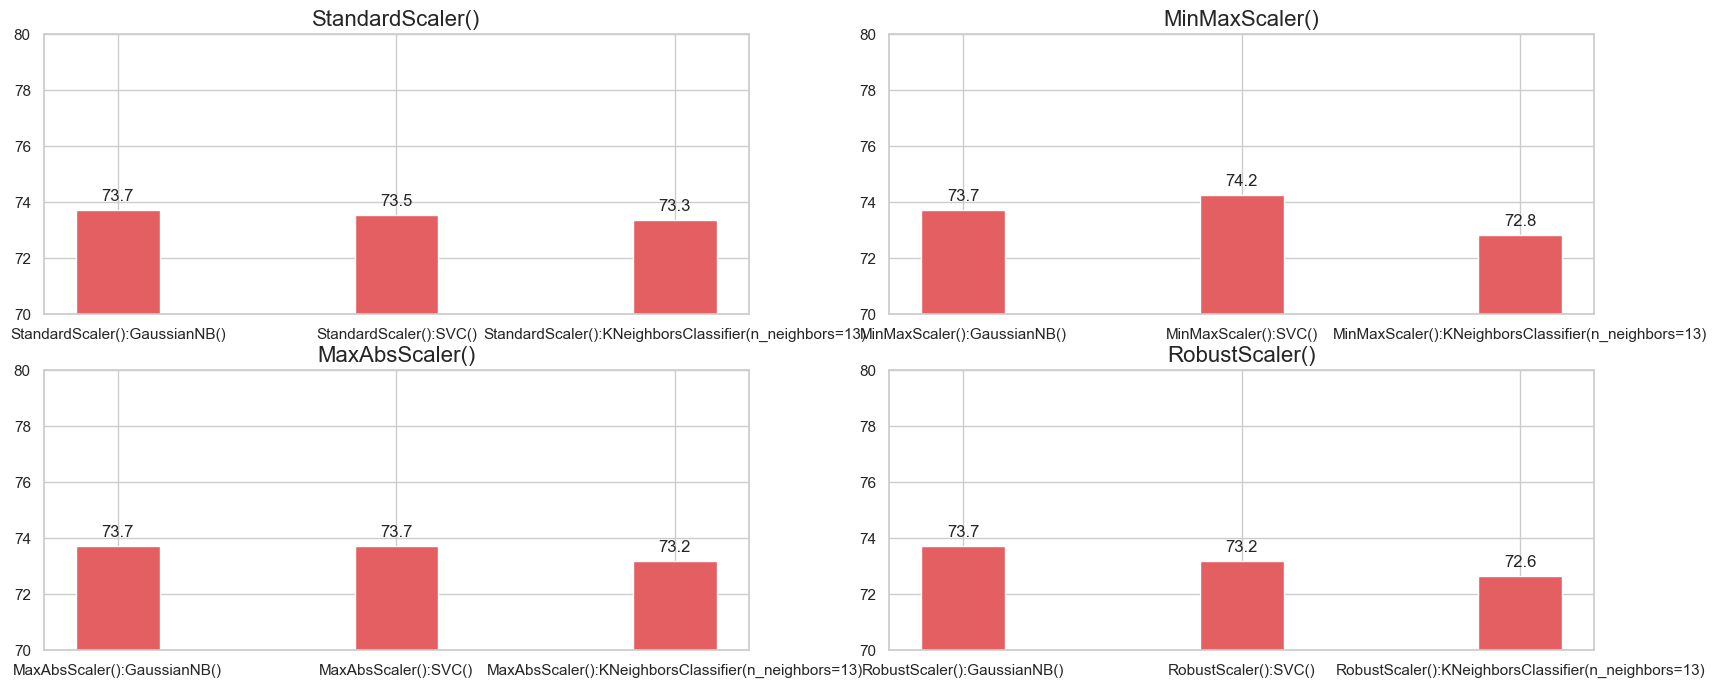

In [85]:
hg_score_name = []
hg_score_score = []
hg_model = [gnb,svc,knn]

# Scaling Model
ssc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rsc = RobustScaler()

scl_list = [ssc,mms,mas,rsc]
for scl in scl_list:
    scl.fit(X_train)
    train_data = scl.transform(X_train)
    test_data = scl.transform(X_test)
    for mdl in hg_model:
        scoring = "accuracy"
        score = cross_val_score(mdl, train_data,y_train, cv=k_fold, n_jobs=1, scoring = scoring)
        hg_score_name.append(str(scl)+":"+str(mdl))
        score = round(np.mean(score)*100,2)

        hg_score_score.append(score) 
        
        
plt.figure(figsize=(20,8))

for i in range(4):
    plt.subplot(2,2,i+1)
    x = hg_score_name[(3*i):+(3*i)+3]
    y = hg_score_score[(3*i):+(3*i)+3]
    scaler_name = hg_score_name[3*i].split(':')[0]
    plt.title(scaler_name, fontsize=16) # Add title with scaler name
    for i in range(len(x)):
        height = y[i]
        plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
    plt.ylim(70,80)
    plt.bar(x,y,color='#e35f62', width=0.3)
# for i in range(4):
#     plt.subplot(2,2,i+1)
#     x = hg_score_name[(3*i):+(3*i)+3]
#     y = hg_score_score[(3*i):+(3*i)+3]
#     for i in range(len(x)):
#         height = y[i]
#         plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
#     plt.ylim(70,80)
#     plt.bar(x,y,color='#e35f62')  
    
    


As a result of scaling, it can be seen that the score of GNB is not significantly affected by the scaling model, but nevertheless obtains a high score. Although the SVC and KNN machine learning models were affected, it can be seen that both SVCs scored higher.

only the GNB and SVC models was an efficient method
Through the Data scaling, Got the same score in GNB Model. 

# Find Out Optimal Parameter Value

## Gaussian Naive Bayes

There is different parameters between GaussianNB and SVC model. So using GridSearchCV to get the optimal value, but seperate into two part with model, set the parameter with meaningful keys by each model.

In [86]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [87]:
# Set Scaling Model
scl = RobustScaler()
scl.fit(X_train)
train_data = scl.transform(X_train)


In [45]:
priors_range = np.arange(0.1, 1, 0.001)
scores = []
# loop over the range of priors and evaluate the performance of the model using 5-fold cross-validation
for prior in priors_range:
    clf = GaussianNB(priors=[prior, 1-prior])
    cv_scores = cross_val_score(clf, train_data, y_train, cv=7)
    scores.append(np.mean(cv_scores))

# find the optimal prior that gives the highest cross-validation score
optimal_prior = priors_range[np.argmax(scores)]
print("Optimal prior: ",optimal_prior)
print("Optimal prior's Score: ",(round(max(scores),4)*100))

Optimal prior:  0.2560000000000001
Optimal prior's Score:  74.06


In [46]:
optimal_prior = 0.256
clf = GaussianNB(priors=[optimal_prior,1-optimal_prior])
score = cross_val_score(clf, train_data,y_train, cv=7, n_jobs=1, scoring = "accuracy")
score = round(np.mean(score)*100,2)
print(score)

74.06


In [47]:
clf.fit(X_train,y_train)
gnb_test_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.7367021276595744

In [48]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")

# Get classification report
print("Classification Report:")
print(classification_report(y_test, gnb_test_pred))

Accuracy: 73.67%
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.16      0.24        99
           1       0.76      0.94      0.84       277

    accuracy                           0.74       376
   macro avg       0.63      0.55      0.54       376
weighted avg       0.69      0.74      0.68       376



## RandomForestClassifier

according to characteristic of this model and features of this dataset RFC can be prepare model by setting optimal parameter

In [49]:
params = {
    'random_state':(0,10,20,30,50),
    'n_estimators':(10,30,50,100, 200),
    'max_depth' : (3,5, 8, 15),
    'min_samples_leaf' : (4, 8, 18, 20),
    'min_samples_split' : (4, 8, 16, 20)
}
rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('Optimal Hyperparameters:', grid_cv.best_params_)
print('Optimal prediction accuracy: {0:.4f}'.format(grid_cv.best_score_))

Optimal Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 10, 'random_state': 0}
Optimal prediction accuracy: 0.7407


In [50]:
rf_model = RandomForestClassifier(n_estimators=10,random_state=0,max_depth=3,min_samples_leaf=8,min_samples_split=4)
rf_model.fit(X_train, y_train)
rfc_test_pred = rf_model.predict(X_test)
rf_model.score(X_test,y_test)
print("Classification Report:")
print(classification_report(y_test, rfc_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.03      0.06        99
           1       0.74      0.98      0.84       277

    accuracy                           0.73       376
   macro avg       0.54      0.50      0.45       376
weighted avg       0.63      0.73      0.63       376



<BarContainer object of 2 artists>

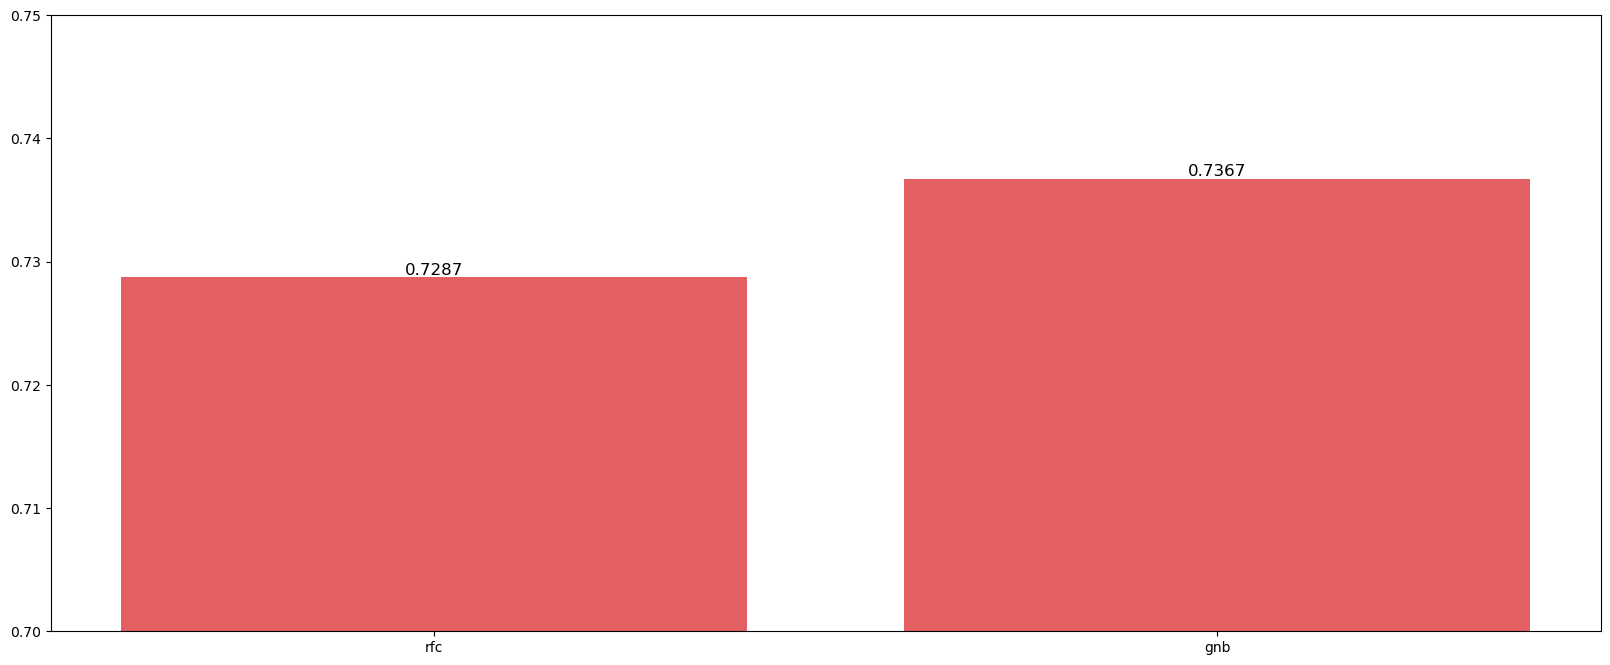

In [52]:
x = ["rfc","gnb"]
y = [rf_model.score(X_test,y_test),clf.score(X_test,y_test)]
plt.figure(figsize=(20,8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height, '%.4f' %height, ha='center', va='bottom', size = 12)
plt.ylim(0.7,0.75)
plt.bar(x,y,color='#e35f62')

The previous results show that the Naive Bayes model scored the highest score without tuning, and also the accuracy obtained by finding the optimized tuning value of the Naive Bayes model showed higher accuracy than the tuned Random Forest Classifier. Therefore, since the results may vary depending on the tuning method and parameter setting method of each model, so it is the most efficient way to find a machine learning model that is best suited to the data by improving understanding of the characteristics and performance of each model.


In [91]:
scl = MinMaxScaler()
scl.fit(X_train)
train_data = scl.transform(X_train)
test_data = scl.transform(X_test)
C_values = [0.1, 1, 10, 100]  # Example values for the hyperparameter C
scores = []
for C in C_values:
    clf = SVC(C=C)
    cv_scores = cross_val_score(clf, train_data, y_train, cv=7)
    scores.append(np.mean(cv_scores))
    
optimal_C = C_values[np.argmax(scores)]
print("Optimal C value:", optimal_C)
print("Optimal C value's Score:", round(max(scores) * 100, 2))    

Optimal C value: 1
Optimal C value's Score: 72.65


In [92]:
clf = SVC(C=1)
clf.fit(train_data, y_train)

# Make predictions on the test data
y_pred = clf.predict(test_data)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2))

Accuracy: 72.61
